# Pandas

## Introduction

- library for Data Analysis and Manipulation

**Why Pandas?**

- provides ability to work with Tabular data
  - `Tabular Data` : data that is organized into tables having rows and cols

In [2]:
""" 
cd .\01pandas\
jupyter nbconvert --to markdown pandas.ipynb --output README.md

<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style> 
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
})


## `Series` objects

- A `Series` object is 1D array that can hold/store data.

### Creating a `Series`

In [9]:
l = ["C", "C++", "Python", "Javascript"]
s = pd.Series(l)
s

0             C
1           C++
2        Python
3    Javascript
dtype: object

#### Init from `dict`

In [2]:
weights = {"a": 68, "b": 83, "c": 86, "d": 68}
s3 = pd.Series(weights)
s3


a    68
b    83
c    86
d    68
dtype: int64

### Similar to a 1D `ndarray`

`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [3]:
import numpy as np

s = pd.Series([2,4,6,8])
np.exp(s)

0       7.389056
1      54.598150
2     403.428793
3    2980.957987
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [4]:
s + [1000,2000,3000,4000]

0    1002
1    2004
2    3006
3    4008
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called * broadcasting*:

In [5]:
s + 1000

0    1002
1    1004
2    1006
3    1008
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [6]:
s < 0

0    False
1    False
2    False
3    False
dtype: bool

### Indexing

In [28]:
s2 = pd.Series(l, index=["a", "b", "c", "d"])
s2

a             C
b           C++
c        Python
d    Javascript
dtype: object

You can then use the `Series` just like a `dict`:

In [11]:
s2["b"]

'C++'

You can still access the items by integer location, like in a regular array:

In [12]:
s2[1]

'C++'

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [13]:
s2.loc["b"]

'C++'

In [14]:
s2.iloc[1]

'C++'

#### Slicing a `Series` also slices the index labels:

In [15]:
s2.iloc[1:3]

b       C++
c    Python
dtype: object

This can lead to unexpected results when using the default numeric labels, so be careful:

In [16]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [17]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [18]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [19]:
surprise_slice.iloc[0]

1002

You can create a `Series` object from a `dict`. The keys will be used as index labels:

a    68
b    83
c    86
d    68
dtype: int64

## `DataFrame` objects

A `DataFrame` is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

- A DataFrame object represents a 2d labelled array, with cell values, column names and row index labels
- You can see `DataFrame`s as dictionaries of `Series`.



<div align="center">
<img src="img/anatomy.png" alt="anatomy.jpg" width="1000px">
</div>

## Creating `DataFrame`

### From Numpy Array

In [3]:
arr = np.random.randint(10,100,size=(6,4))
arr

array([[90, 50, 90, 34],
       [68, 30, 90, 40],
       [96, 57, 18, 68],
       [86, 48, 25, 13],
       [43, 81, 82, 16],
       [29, 88, 21, 97]])

In [5]:
df = pd.DataFrame(arr)
df

,0,1,2,3
0,90,50,90,34
1,68,30,90,40
2,96,57,18,68
3,86,48,25,13
4,43,81,82,16
5,29,88,21,97


In [6]:
arr = np.random.randint(10, 100, size=(6, 4))
df = pd.DataFrame(data=arr)
df.columns = ["a", "b", "c", "d"]
df.index = "p q r s t u".split()
df


,a,b,c,d
p,57,82,15,40
q,90,98,76,56
r,21,65,82,64
s,63,26,65,45
t,14,76,31,19
u,65,33,70,41


### 🚀🚀 lists of lists: row wise data

In [8]:
list(np.random.random(3))

[0.29607993273364797, 0.6287879088794833, 0.579837810189545]

In [9]:
np.random.seed(100)
row1 = ['TeKET'] + list(np.random.random(3))
row2 = ['Yake'] + list(np.random.random(3))
row3 = ['TP'] + list(np.random.random(3))
row4 = ['IFTDF'] + list(np.random.random(3))

values = [
            row1,
            row2,
            row3,
            row4
         ]
d3 = pd.DataFrame(
        values,
        columns=['Model', 'precision', 'recall', 'f1'],
      #   index=["alice", "bob", "charles"]
     )
d3

,Model,precision,recall,f1
0,TeKET,0.543405,0.278369,0.424518
1,Yake,0.844776,0.004719,0.121569
2,TP,0.670749,0.825853,0.136707
3,IFTDF,0.575093,0.891322,0.209202


In [10]:
# 🚀 filling missing values with list unpacking
values = [
    [1985, *([None]*3)],
    [1984, 3, *([np.nan] * 2)],
    [1992, 0, np.nan, 112]
]
d4 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
     )
d4


,birthyear,children,hobby,weight
0,1985,NaN,NaN,NaN
1,1984,3.0,NaN,NaN
2,1992,0.0,NaN,112.0


### dict of narray/lists

To specify missing values, you can either use `np.nan` or NumPy's masked arrays:

Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [11]:
data = {'Name': ['Tom', 'nick', 'jhon', 'jack'],
        'Age': [20, 21, 19, 18]}

df = pd.DataFrame(data)

df


,Name,Age
0,Tom,20
1,nick,21
2,jhon,19
3,jack,18


### 🚀🚀list of dicts: column wise data

In [12]:
data = [{'a': 1, 'b': 2, 'c': 3},
        {'a': 10, 'b': 20, 'c': 30}]

# Creates DataFrame.
df = pd.DataFrame(data)

# Print the data
df


,a,b,c
0,1,2,3
1,10,20,30


### 🚀using `zip()`; list of tuple

Two lists can be merged by using `list(zip())` function. 

In [ ]:
# List1
Name = ['tom', 'jhon', 'nick', 'juli']

# List2
Age = [25, 30, 26, 22]

# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(Name, Age))
print(list_of_tuples)

# Assign data to tuples.
list_of_tuples


# Converting lists of tuples into
# pandas Dataframe.
df = pd.DataFrame(list_of_tuples,
                  columns=['Name', 'Age'])

# Print data.
df


[('tom', 25), ('jhon', 30), ('nick', 26), ('juli', 22)]


,Name,Age
0,tom,25
1,jhon,30
2,nick,26
3,juli,22


### Dicts of series.

In [ ]:
d = {'one': pd.Series([10, 20, 30, 40],
                      index=['a', 'b', 'c', 'd']),
     'two': pd.Series([10, 20, 30, 40],
                      index=['a', 'b', 'c', 'd'])}

# creates Dataframe.
df = pd.DataFrame(d)

# print the data.
df


,one,two
a,10,10
b,20,20
c,30,30
d,40,40


## Saving & loading files

Pandas can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database. Let's create a `DataFrame` to demonstrate this:

In [13]:
df = pd.DataFrame({
	"id":np.arange(10),
	'b':np.random.normal(size=10),
	"c":pd.Series(np.random.choice(["cat",'dog',"hippo"],replace=True,size=10))
})
df.head()

,id,b,c
0,0,-0.458027,cat
1,1,0.435163,hippo
2,2,-0.583595,dog
3,3,0.816847,dog
4,4,0.672721,hippo


### Saving: creating new file


Let's save it to CSV, HTML and JSON:

In [ ]:
df.to_csv("my_df.csv")
df.to_csv("my_df_index_false.csv", index=False)
df.to_html("my_df.html")
df.to_json("my_df.json")


### Saving: Append to Existing File

In [ ]:
data = {
    'Name': [ 'Bob', 'Jessica', 'Mary'],
    'Run': [50, 63, 15],
    'Wicket': [0, 2, 3],
    'Catch': [4, 2, 1]
}

# Make data frame of above data
df = pd.DataFrame(data)

# append data frame to CSV file
df.to_csv('d.csv', mode='a', index=False, header=False)

### Loading

Now let's load our CSV file back into a `DataFrame`:

- Loading from file saved without `index=False`

In [ ]:
my_df_loaded = pd.read_csv("my_df.csv")
my_df_loaded.head()

,Unnamed: 0,id,b,c
0,0,0,1.106266,hippo
1,1,1,-1.612778,cat
2,2,2,-0.264879,cat
3,3,3,-0.213137,cat
4,4,4,-0.184308,hippo


- Loading from file saved with `index=False`

In [ ]:
my_df_loaded_index_false = pd.read_csv("my_df_index_false.csv")
my_df_loaded_index_false.head()

,id,b,c
0,0,1.106266,hippo
1,1,-1.612778,cat
2,2,-0.264879,cat
3,3,-0.213137,cat
4,4,-0.184308,hippo


- Loading from file saved without `index=False`, without `Unnamed: 0` column

The `pd.read_csv()` function is well-endowed, with over 30 optional parameters you can specify. For example, you can see in this dataset that the CSV file has a built-in index, which pandas did not pick up on automatically. To make pandas use that column for the index (instead of creating a new one from scratch), we can specify an `index_col`.

In [ ]:
my_df_loaded = pd.read_csv("my_df.csv",index_col=0)
my_df_loaded.head()

,id,b,c
0,0,1.106266,hippo
1,1,-1.612778,cat
2,2,-0.264879,cat
3,3,-0.213137,cat
4,4,-0.184308,hippo


- Or Dropping "Unnamed: 0" Column

In [ ]:
my_df_loaded = pd.read_csv("my_df.csv")
my_df_loaded = my_df_loaded.drop(columns=['Unnamed: 0'])
my_df_loaded.head()


,id,b,c
0,0,1.106266,hippo
1,1,-1.612778,cat
2,2,-0.264879,cat
3,3,-0.213137,cat
4,4,-0.184308,hippo


As you might guess, there are similar `read_json`, `read_html`, `read_excel` functions as well.  We can also read data straight from the Internet. For example, let's load the top 1,000 U.S. cities from github:

In [ ]:
us_cities = None
try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

,State,Population,lat,lon
City,,,,
Marysville,Washington,63269,48.051764,-122.177082
Perris,California,72326,33.782519,-117.228648
Cleveland,Ohio,390113,41.499320,-81.694361
Worcester,Massachusetts,182544,42.262593,-71.802293
Columbia,South Carolina,133358,34.000710,-81.034814


#### Minimize the size of Large DataSet; `nrows=n`

[wine-reviews-dataset](https://www.kaggle.com/zynicide/wine-reviews)

In [ ]:
data = pd.read_csv('winemag-data-130k-v2.csv')
print(f"Pre Shape : {data.shape}")
# read only first 100 rows
data = pd.read_csv('winemag-data-130k-v2.csv', nrows=100, index_col=0)
data.head(n=2)

Pre Shape : (129971, 14)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [ ]:
# Save the dataframe to a csv file
data.to_csv("winemag-data-130k-v2-mod.csv")

#### 🔥Load All Csv Files In A Folder

Read all csv files in a folder and process them one by one:

In [2]:
import glob
import os
all_files = glob.glob("data/reports/*.csv")
for file in all_files:
		reviewer = os.path.basename(file).split(".")[0]
		print(reviewer)
		report = pd.read_csv(file)
		# generate_report_plot(report,reviewer,with_similarity_threshold=True)

Read all csv files in a folder and combine them into a single dataframe:

In [5]:
import glob
import os
all_files = glob.glob("animals/*.csv")
df = pd. concat((pd.read_csv(f) for f in all_files))
df

Without `glob`, you would have to manually list all the files you want to read:

In [ ]:
folder = "example_folder"
files = [x for x in os.listdir(folder) if x.endswith(".csv")]
# get full path
files = [os.path.join(folder, x) for x in files]
files[0]

## Indexing

### 🚀Extracting Columns `df[col]`, `df[[col1,col2,..]]` + `.values` property

In [3]:
np.random.seed(10)
arr = np.random.randint(10, 100, size=(6, 4))
df = pd.DataFrame(data=arr,columns=["a", "b", "c", "d"])
# df.columns = ["a", "b", "c", "d"]
df

,a,b,c,d
0,19,25,74,38
1,99,39,18,83
2,10,50,46,26
3,21,64,98,72
4,43,82,88,59
5,61,64,87,79


In Python, we can access the property of an object by accessing it as an attribute. A `book` object, for example, might have a `title` property, which we can access by calling` book.title`. `Columns` in a pandas DataFrame work in much the same way.

In [4]:
df.c
# If column name has spaces, this will not work

0    74
1    18
2    46
3    98
4    88
5    87
Name: c, dtype: int32

If we have a Python dictionary, we can access its values using the indexing (`[]`) operator. We can do the same with `columns` in a DataFrame:

In [9]:
''' SELECT c from df '''

df['c']

0    74
1    18
2    46
3    98
4    88
5    87
Name: c, dtype: int32

Indexing operator `[]` does have the advantage that it can handle `column` names with **reserved characters** in them (e.g. if we had a `country providence` column, `reviews.country providence` wouldn't work).

Doesn't a pandas Series look kind of like a fancy dictionary? It pretty much is, so it's no surprise that, to drill down to a **single specific value**, we need only use the indexing operator `[]` once more:

In [10]:
df['c'][0]

74

use `.values` to get the values in a array

In [5]:
df['c'].values

array([74, 18, 46, 98, 88, 87])

multiple columns can be extracted at once:

In [11]:
''' SELECT b,c,a from df '''

df[['b','c','a']]

,b,c,a
0,25,74,19
1,39,18,99
2,50,46,10
3,64,98,21
4,82,88,43
5,64,87,61


In [8]:
df[['b', 'c', 'a']].values


array([[25, 74, 19],
       [39, 18, 99],
       [50, 46, 10],
       [64, 98, 21],
       [82, 88, 43],
       [64, 87, 61]])

### 🚀Index-based selection - `iloc[row_indexer,col_indexer]`


In [87]:
np.random.seed(10)
arr = np.random.randint(10, 100, size=(6, 4))
df = pd.DataFrame(data=arr)
df.columns = ["a", "b", "c", "d"]
df.index = "p q r s t u".split()
df

,a,b,c,d
p,19,25,74,38
q,99,39,18,83
r,10,50,46,26
s,21,64,98,72
t,43,82,88,59
u,61,64,87,79


Pandas indexing works in one of two paradigms. The first is **index-based selection**: ***selecting data based on its numerical position in the data***. `iloc` follows this paradigm.

In [85]:
first_row = df.iloc[0]
first_row

a    19
b    25
c    74
d    38
Name: p, dtype: int32

Both `loc` and `iloc` are `row-first, column-second`. This is the opposite of what we do in native `Python`, which is `column-first, row-second`.

This means that it's marginally easier to retrieve `rows`, and marginally harder to get retrieve `columns`. To get a column with `iloc`, we can do the following:

In [30]:
df.iloc[:, 0] # all rows, first column

p    19
q    99
r    10
s    21
t    43
u    61
Name: a, dtype: int32

On its own, the `:` operator, which also comes from native Python, means `"everything"`. When combined with other selectors, however, it can be used to indicate a range of values. For example, to select the country column from just the first, second, and third row, we would do:

Or, to select just the second and third entries, we would do:

In [19]:
df.iloc[1:3, 0] # second and third row, first column

q    99
r    10
Name: a, dtype: int32

It's also possible to pass a list:

In [20]:
df.iloc[[0, 1, 2], 0] # first three rows, first column

p    19
q    99
r    10
Name: a, dtype: int32

In [21]:
df.iloc[:, 0:3] # all rows, first three columns

,a,b,c
p,19,25,74
q,99,39,18
r,10,50,46
s,21,64,98
t,43,82,88
u,61,64,87


In [23]:
df.iloc[:2,:3] # first two rows, first three columns

,a,b,c
p,19,25,74
q,99,39,18


In [25]:
df.iloc[:2, [1,3]] # first two rows, second and fourth columns

,b,d
p,25,38
q,39,83


In [31]:
df.iloc[1,3]

83

In [34]:
df.iloc[1:3][['a','b']]

,a,b
q,99,39
r,10,50


In [36]:
df.iloc[1:3,[df.columns.get_loc(v) for v in ['a','b']]]

,a,b
q,99,39
r,10,50


### 🚀Label-based selection - `loc[row_indexer,col_indexer]`

The second paradigm for attribute selection is the one followed by the `loc` operator: **label-based selection**. In this paradigm, it's the **data index value**, **not its position**, which matters.

In [38]:
x = df.loc["p"]
print(type(x))
x

<class 'pandas.core.series.Series'>


a    19
b    25
c    74
d    38
Name: p, dtype: int32

Accessing a single row with list of labels returns a `DataFrame` object:

In [39]:
x1= df.loc[["p"]]
print(type(x1))
x1

<class 'pandas.core.frame.DataFrame'>


,a,b,c,d
p,19,25,74,38


`iloc` is conceptually simpler than loc because it ignores the dataset's indices. When we use iloc we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. `loc`, by contrast, uses the information in the indices to do its work. Since your dataset usually has meaningful indices, it's usually easier to do things using loc instead. 

In [41]:
df.loc[["p","u"]]

,a,b,c,d
p,19,25,74,38
u,61,64,87,79


In [43]:
df.loc["p","a"]

19

In [42]:
df.loc[["p","u"],["a"]]

,a
p,19
u,61


#### Choosing between loc and iloc

When choosing or transitioning between `loc` and `iloc`, there is one "gotcha" worth keeping in mind, which is that the two methods use slightly different indexing schemes.

iloc uses the Python stdlib indexing scheme, where the first element of the range is included and the last one excluded. So 0:10 will select entries 0,...,9. loc, meanwhile, indexes inclusively. So 0:10 will select entries 0,...,10.

Why the change? Remember that `loc` can **index any stdlib type:** `strings`, for example. If we have a `DataFrame` with `index` values `Apples,...,Potatoes, ...`, and we want to select *"all the alphabetical fruit choices between Apples and Potatoes"*, then it's a lot more convenient to index `df.loc['Apples':'Potatoes']` than it is to index something like `df.loc['Apples', 'Potatoet']` (t coming after s in the alphabet).

This is particularly **confusing when the DataFrame index is a simple numerical list**, e.g. `0,...,1000`. In this case `df.iloc[0:1000]` will return `1000` entries, while `df.loc[0:1000]` return `1001` of them! To get `1000` elements using `loc`, you will need to go one lower and ask for `df.loc[0:999]`.

Otherwise, the semantics of using `loc` are the same as those for `iloc`.

cols = ['country', 'variety']
df = reviews.loc[:99, cols]

equivalent to:

cols_idx = [0, 11]
df = reviews.iloc[:100, cols_idx]

### 🚀🚀 Split Input and Output Features and convert to NumPy arrays


In [3]:
data = pd.read_csv("weight-height-min.csv")
data.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
X = data['Height']
print("Type of X:", type(X))
print("Shape of X:", X.shape)

X = data[['Height']]
print("Type of X:", type(X))
print("Shape of X:", X.shape)

X = data['Height'].values
print("Type of X:", type(X))
print("Shape of X:", X.shape)

X = data['Height'].values.reshape(-1,1)
print("Type of X:", type(X))
print("Shape of X:", X.shape)


Type of X: <class 'pandas.core.series.Series'>
Shape of X: (100,)
Type of X: <class 'pandas.core.frame.DataFrame'>
Shape of X: (100, 1)
Type of X: <class 'numpy.ndarray'>
Shape of X: (100,)
Type of X: <class 'numpy.ndarray'>
Shape of X: (100, 1)


In [5]:
X = data.iloc[:, 1].values
print("Shape of X:", X.shape)
X =  X.reshape(-1, 1)
y = data.iloc[:, 2].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Type of X:", type(X))
print("Type of y:", type(y))


Shape of X: (100,)
Shape of X: (100, 1)
Shape of y: (100,)
Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


In [7]:
X = data.drop(['Weight'], axis=1)
y = data['Weight']
X.shape, y.shape

((100, 2), (100,))

### ♻️Reset Index

In [8]:
df = pd.DataFrame({"Name": ["Josh", "Mike", "Ana", "Yohanna"], "Employee_Number": [11286474, 17588462, 26735655, 18653472],
                   "Income": [5000, 7000, 9000, 6000], "Age": [35, 19, 26, 32]})
df


,Name,Employee_Number,Income,Age
0,Josh,11286474,5000,35
1,Mike,17588462,7000,19
2,Ana,26735655,9000,26
3,Yohanna,18653472,6000,32


In [9]:
# Inplace argument assign new indexes directly
df.set_index("Employee_Number", inplace=True)
df


,Name,Income,Age
Employee_Number,,,
11286474,Josh,5000,35
17588462,Mike,7000,19
26735655,Ana,9000,26
18653472,Yohanna,6000,32


In [10]:
df.reset_index(inplace=True)
df


,Employee_Number,Name,Income,Age
0,11286474,Josh,5000,35
1,17588462,Mike,7000,19
2,26735655,Ana,9000,26
3,18653472,Yohanna,6000,32


## 🚀🚀Masking - logical filtering

In [14]:
drinks = pd.read_csv('drinks.csv')
display(drinks.head(n=2))

drinks['total_servings'] = drinks.beer_servings + drinks.spirit_servings + drinks.wine_servings
display(drinks.head(n=2))

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275


### `SELECT * FROM df WHERE columnX = value`

In [16]:
'''
How it works:
    drinks.continent=='EU' by itself returns a bunch
        of Trues and Falses
        
drinks.continent=='EU'

See?


when you wrap drinks around it with square brackets
you're telling the drinks dataframe to select
only those that are True, and not the False ones

drinks[drinks.continent=='EU']
'''
drinks.continent == 'EU'  # this is a series of T and F

# we put tht series of Trues and Falses directly into the square brackets of justice
drinks[drinks.continent == 'EU'].head(n=2)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU


This result can then be used inside of `loc` to select the relevant data:

In [15]:
res = drinks.loc[drinks.continent == 'EU']
res.head(n=2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU


### 🔥`SELECT col1,col2.. FROM df WHERE columnX = value`

In [14]:
# North American countries with total servings
# drinks[['country', 'total_servings']][drinks.continent=='NA']

new_df = drinks[['country', 'total_servings']]  # selection of two columns
new_df[drinks.continent == 'EU'].head(n=2)

,country,total_servings
1,Albania,275
3,Andorra,695


Filtering with `loc` gives us flexibility.

In [15]:
# res = drinks.loc[drinks.continent == 'EU', ['country', 'total_servings']]
mask = drinks.continent == 'EU'
cols = ['country', 'total_servings']
res = drinks.loc[mask,cols]

res.head(n=2)


,country,total_servings
1,Albania,275
3,Andorra,695


### `SELECT * FROM df WHERE col1 = value 🤝AND🤝 col2 = value`

In [34]:
# countries with wine servings over 300 and spirit_servings over 12
drinks[drinks.wine_servings > 300][drinks.spirit_servings > 100]


C:\Users\soiko\AppData\Local\Temp/ipykernel_10756/3627733318.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drinks[drinks.wine_servings > 300][drinks.spirit_servings > 100]


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
3,Andorra,245,138,312,12.4,EU,695
61,France,127,151,370,11.8,EU,648


In [36]:
# Same result but using python logic operators
# Note the paranthesis around each filter when using logical operators
drinks[(drinks.wine_servings > 300) & (drinks.spirit_servings > 100)]


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
3,Andorra,245,138,312,12.4,EU,695
61,France,127,151,370,11.8,EU,648


### `SELECT * FROM df WHERE col1 = value 🤝OR🤝 col2 = value`

In [41]:
drinks[(drinks.continent == 'EU') | (drinks.continent == 'AS')].head(n=2)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275


### `SELECT * FROM df WHERE condition1 SORT BY col1`

- [https://www.geeksforgeeks.org/how-to-sort-pandas-dataframe/](https://www.geeksforgeeks.org/how-to-sort-pandas-dataframe/)

In [64]:
drinks[['country', 'total_servings']][drinks.continent ==
                                      'EU'].sort_values(by=['total_servings'], ascending=False).head()


,country,total_servings
3,Andorra,695
45,Czech Republic,665
61,France,648
98,Lithuania,643
99,Luxembourg,640


In [65]:
# 2. What are the top three beer drinking countries?
drinks[['country', 'beer_servings']].sort_values(by='beer_servings').tail(3)


,country,beer_servings
62,Gabon,347
45,Czech Republic,361
117,Namibia,376


In [67]:
# 3. What are the top three beer drinking countries in Europe?
drinks[drinks.continent == 'EU'][['country', 'beer_servings']
                                 ].sort_values(by='beer_servings', ascending=False).head(3)


,country,beer_servings
45,Czech Republic,361
65,Germany,346
135,Poland,343


### Opposite Filter `(~)`

We can get opposite of a filter with `~(Tilde)` sign.

In [15]:
employees = pd.DataFrame({"Name": ["Josh", "Mike", "Julia", "Sergio"],
                          "Department": ["IT", "Human Resources", "Finance", "Supply Chain"],
                          "Income": [4800, 5200, 6600, 5700],
                          "Age": [24, 28, 33, 41]})
employees


,Name,Department,Income,Age
0,Josh,IT,4800,24
1,Mike,Human Resources,5200,28
2,Julia,Finance,6600,33
3,Sergio,Supply Chain,5700,41


In [17]:
employees[~(employees["Income"]>5300)]

,Name,Department,Income,Age
0,Josh,IT,4800,24
1,Mike,Human Resources,5200,28


In [18]:
employees[~(employees["Age"]<35)]

,Name,Department,Income,Age
3,Sergio,Supply Chain,5700,41


### `isin()` ; `SELECT * FROM df WHERE columnX IN (value1,value2,..)`

`isin` is lets you select data whose value `"is in"`**a list of values**. For example, here's how we can use it to select wines only from `Italy` or `France`:



In [10]:
cols = ['country', 'spirit_servings', 'beer_servings']
res = drinks.loc[drinks.continent.isin(['EU', 'AS']),cols]
res.head(n=3)


,country,spirit_servings,beer_servings
0,Afghanistan,0,0
1,Albania,132,89
3,Andorra,138,245


### "NOT IN" - `df[~df['col_name'].isin(values_list)]`

- [https://www.statology.org/pandas-not-in/](https://www.statology.org/pandas-not-in/)
- [https://www.geeksforgeeks.org/how-to-use-not-in-filter-in-pandas/](https://www.geeksforgeeks.org/how-to-use-not-in-filter-in-pandas/)

In [15]:
#create DataFrame
df = pd.DataFrame({'star_team': ['A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'],
                   'backup_team': ['B', 'B', 'C', 'C', 'D', 'D', 'D', 'E'],
                   'points': [25, 12, 15, 14, 19, 23, 25, 29],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})

#define list of teams we don't want
values_list = ['A', 'B']

#filter for rows where team name is not in list
df[~df['star_team'].isin(values_list)]


,star_team,backup_team,points,assists,rebounds
6,C,D,25,9,9
7,C,E,29,4,12


Example 2: Perform “NOT IN” Filter with Multiple Columns

In [16]:
#define list of teams we don't want
values_list = ['C', 'E']

#filter for rows where team name is not in one of several columns
df[~df[['star_team', 'backup_team']].isin(values_list).any(axis=1)]


,star_team,backup_team,points,assists,rebounds
0,A,B,25,5,11
1,A,B,12,7,8
4,B,D,19,12,6
5,B,D,23,9,5


### 🔥🔥Replacing/Updating on condition

DataFrame update can be done in the same statement of selection and filter with a slight change in syntax. You can update values in columns applying different conditions.

For example, we will update the degree of persons whose age is greater than 28 to “PhD”.



In [48]:
raw_data = {'first_name': ['Sam', 'Ziva', 'Kia', 'Robin', 'Kim'], 
         'degree': ["MBA", "MS", "Graduate", "Arts", "MS"],
         'nationality': ["USA", "India", "UK", "France", "Canada"],
         'age': [25, 29, 19, 21, 33],
         'grade':['A+',  'A', 'C', np.nan, 'B-']}

df = pd.DataFrame(raw_data, columns = ['first_name', 'degree','nationality',
         'age','grade'])
df

,first_name,degree,nationality,age,grade
0,Sam,MBA,USA,25,A+
1,Ziva,MS,India,29,A
2,Kia,Graduate,UK,19,C
3,Robin,Arts,France,21,NaN
4,Kim,MS,Canada,33,B-


In [50]:
#Update the degree to "PhD" for the selected persons

df.loc[df['age'] > 28, "degree"] = "PhD"
df


,first_name,degree,nationality,age,grade
0,Sam,MBA,USA,25,A+
1,Ziva,PhD,India,29,A
2,Kia,Graduate,UK,19,C
3,Robin,Arts,France,21,NaN
4,Kim,PhD,Canada,33,B-


###  Select all rows containing a sub string

In [51]:
df[df.degree.str.contains('duate', case=False)]


,first_name,degree,nationality,age,grade
2,Kia,Graduate,UK,19,C


###  `isnull`

The second is `isnull` (and its companion `notnull`). These methods let you highlight values which are (or are not) e`mpty (`NaN`). For example, to filter out wines lacking a price tag in the dataset, here's what we would do:


In [47]:
res = drinks.loc[drinks.continent.isnull(), ['country', 'wine_servings']]
res.head(n=3)


,country,wine_servings
5,Antigua & Barbuda,45
11,Bahamas,51
14,Barbados,36


## Querying a `DataFrame`

### Introduction

The `query()` method lets you filter a `DataFrame` based on a query expression:

In [43]:
df = pd.read_csv('titanic_train.csv')
df.head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Let’s find all the passengers that embarked from `Southampton (‘S’)`. Using `square` bracket indexing, the code looks like this:

`df[df['Embarked'] == 'S'].head(n=2)`

However, if you use the `query()` method, it looks neater:

`df.query('Embarked == "S"')`

In [47]:
df.query('Embarked == "S"').head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


Very often, you might want to pass in values of variables into your query string. You can do so using the `@` character:

In [52]:
embarked = 'S'
df.query('Embarked == @embarked').head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


Alternatively, you can also use a f-string, like this:

In [49]:
df.query(f'Embarked == "{embarked}"').head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


### Specifying Multiple Conditions

In [54]:
df[(df['Embarked'] == 'S') | (df['Embarked'] == 'C')].head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Notice that you need to reference your dataframe (df) twice in your condition. Using the query() method, this is a walk in the park:

In [56]:
df.query('Embarked in ("S","C")').head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


If you want to find all passengers who did not embarked from Southampton (‘S’) or Cherbourg (‘C’), you can use the negation operator `(~)` in Pandas: `df[~((df['Embarked'] == 'S') | (df['Embarked'] == 'C'))]`

In [57]:
df.query('Embarked not in ("S","C")').head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


### Methods within query

Talking about missing values, how do you query for missing values? You can find missing values using the `isnull()` method, when it is applied to column name:

In [58]:
df.query('Embarked.isnull()').head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In fact, you can call various Series methods directly on the column name. Here are some examples:

In [59]:
df.query('Name.str.len() < 20').head(n=2)  # find passengers whose name is 
                                 					# less than 20 characters

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S


In [60]:
df.query(f'Ticket.str.startswith("A")').head(n=2) # find all passengers whose 
                                        # ticket starts with A

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.05,NaN,S


### Comparing Numeric Columns

In [61]:
df.query('Fare > 50').head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


### Comparing Multiple Columns

You can also compare multiple columns using the `and`, `or`, and `not` operators. The following statement retrieves all the rows that has Fare greater than 50 and Age greater than 30:

In [63]:
df.query('Fare > 50 and Age > 30').head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


## CRUD Row/Column Wise 

- [https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/](https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/)

###  Adding Columns

In [ ]:
df = pd.DataFrame({
    "a": [1, 2, 3, 4],
    "b": ["Bob", "Alice", "Bob", "Alice"],
})
df

,a,b
0,1,Bob
1,2,Alice
2,3,Bob
3,4,Alice


#### `d['new_col'] = list()`

In [ ]:
# df['c'] = [1, 2, 3, 4,5] # not valid
# df['c'] = [1, 2, 3] # not valid
df['c'] = [1, 2, 3, 4]
df

,a,b,c
0,1,Bob,1
1,2,Alice,2
2,3,Bob,3
3,4,Alice,4


#### `d['new_col'] = constant`

In [ ]:
df['d'] = np.nan
df

,a,b,c,d
0,1,Bob,1,NaN
1,2,Alice,2,NaN
2,3,Bob,3,NaN
3,4,Alice,4,NaN


In [ ]:
df['d'] = None
df

,a,b,c,d
0,1,Bob,1,None
1,2,Alice,2,None
2,3,Bob,3,None
3,4,Alice,4,None


#### `d['new_col'] = range(len(d))`

In [ ]:
df['d'] = range(len(df))
df


,a,b,c,d
0,1,Bob,1,0
1,2,Alice,2,1
2,3,Bob,3,2
3,4,Alice,4,3


In [ ]:
df['d'] = [None]*len(df)
df


,a,b,c,d
0,1,Bob,1,None
1,2,Alice,2,None
2,3,Bob,3,None
3,4,Alice,4,None


#### `d['new_col'] = d['col1'] + d['col2']` from existing columns

In [ ]:
df['e'] = df['a'] + df['c']
df

,a,b,c,d,e
0,1,Bob,1,0,2
1,2,Alice,2,1,4
2,3,Bob,3,2,6
3,4,Alice,4,3,8


more:

- [Create a new column in Pandas DataFrame based on the existing columns](https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/?ref=lbp)
- [Creating a Pandas dataframe column based on a given condition](https://www.geeksforgeeks.org/python-creating-a-pandas-dataframe-column-based-on-a-given-condition/?ref=lbp)

#### `insert(position,column,value)`

When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [ ]:
df.insert(1, "i", range(len(df)))
df

,a,i,b,c,d
0,1,0,Bob,1,None
1,2,1,Alice,2,None
2,3,2,Bob,3,None
3,4,3,Alice,4,None


#### `assign(new_col,value)`

This method will create a new dataframe with a new column added to the old dataframe. Note that this returns a new `DataFrame` object, **the original is not modified:**

In [ ]:
df2 = df.assign(new=range(len(df)))
df2


,a,i,b,c,d,new
0,1,0,Bob,1,NaN,0
1,2,1,Alice,2,NaN,1
2,3,2,Bob,3,NaN,2
3,4,3,Alice,4,NaN,3


Note that you cannot access columns created within the same assignment:

### Moving Columns Position

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.rand(5, 3))
df['mean'] = df.mean(1)
df

,0,1,2,mean
0,0.016342,0.861809,0.225315,0.367822
1,0.226359,0.728893,0.477359,0.477537
2,0.623582,0.774813,0.920502,0.772966
3,0.950771,0.064937,0.622619,0.546109
4,0.392424,0.147109,0.299565,0.279699


In [ ]:
popped_col = df.pop('mean')
df.insert(0, 'mean', popped_col)
df

,mean,0,1,2
0,0.367822,0.016342,0.861809,0.225315
1,0.477537,0.226359,0.728893,0.477359
2,0.772966,0.623582,0.774813,0.920502
3,0.546109,0.950771,0.064937,0.622619
4,0.279699,0.392424,0.147109,0.299565


In [ ]:
df.insert(0, 'mean', df.pop('mean'))
df

,mean,0,1,2
0,0.367822,0.016342,0.861809,0.225315
1,0.477537,0.226359,0.728893,0.477359
2,0.772966,0.623582,0.774813,0.920502
3,0.546109,0.950771,0.064937,0.622619
4,0.279699,0.392424,0.147109,0.299565


### Adding/Appending Rows

- [https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/](https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/)
 - [https://www.geeksforgeeks.org/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python/](https://www.geeksforgeeks.org/how-to-append-a-list-as-a-row-to-a-pandas-dataframe-in-python/)

#### `append()` [deprecated]

In [ ]:
employees.append({"Name":"Berkay","Department":"Finance","Income":6000,"Age":24},ignore_index=True)

C:\Users\soiko\AppData\Local\Temp\ipykernel_924\3498463607.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  employees.append({"Name":"Berkay","Department":"Finance","Income":6000,"Age":24},ignore_index=True)


,Name,Department,Income,Age
0,Josh,IT,4800,24
1,Mike,Human Resources,5200,28
2,Julia,Finance,6600,33
3,Sergio,Supply Chain,5700,41
4,Berkay,Finance,6000,24


#### 🌰 `concat()` 

In [ ]:
# appending to an empty dataframe
# output = pd.DataFrame()
# or 
# output = pd.DataFrame(columns=["Name","Department","Income","Age"])
# or 
# append to an existing dataframe
# output = pd.DataFrame({"Name":["Josh","Mike","Julia"],
#                           "Department":["IT","Human Resources","Finance"],
#                           "Income":[4800,5200,6600],
#                           "Age":[24,28,33]})
# output

In [ ]:
output = pd.DataFrame()
# data
dictionary = {"Name": "Berkay", "Department": "Finance", "Income": 6000, "Age": 24}
df_dictionary = pd.DataFrame([dictionary])
# append
output = pd.concat([output, df_dictionary], ignore_index=True)
output

,Name,Department,Income,Age
0,Berkay,Finance,6000,24


#### `loc()` - dict

In [ ]:
n = { "Ex": "loc() dict", "value": 10 }
# df.loc[len(df.index)] = n   
# or
df.loc[df.shape[0]] = n

display(df)


,Ex,value
0,A,87
1,B,91
2,C,97
3,A,95
4,append() dict,10
5,append() list,25
6,loc() dict,10


#### `loc()` - list

In [ ]:
# New list for append into df
l = ["loc() list", 25]
 
# using loc methods
df.loc[len(df)] = l
 
# display
display(df)

,Ex,value
0,A,87
1,B,91
2,C,97
3,A,95
4,append() dict,10
5,append() list,25
6,loc() dict,10
7,loc() list,25


#### `iloc[]` - list

In [ ]:
df.iloc[2] = ["iloc() list", 25]
display(df)

,Ex,value
0,A,87
1,B,91
2,iloc() list,25
3,A,95
4,append() dict,10
5,append() list,25
6,loc() dict,10
7,loc() list,25


### Removing Rows/Columns

#### `drop()` - column

In [ ]:
arr = np.random.randint(10, 100, size=(4,8))
df = pd.DataFrame(data=arr,columns=["a", "b", "c", "d", "e", "f", "g", "h"])
df

,a,b,c,d,e,f,g,h
0,11,51,81,84,63,65,36,18
1,56,16,48,10,15,52,63,81
2,25,27,99,24,77,94,11,79
3,39,61,11,31,93,97,28,16


In [ ]:
delC = df.pop('c')  # removes column c
del df["d"] # removes column d
df

,a,b,e,f,g,h
0,11,51,63,65,36,18
1,56,16,15,52,63,81
2,25,27,77,94,11,79
3,39,61,93,97,28,16


In [ ]:
df.drop(columns=['e','f']) # removes columns e, f

,a,b,g,h
0,11,51,36,18
1,56,16,63,81
2,25,27,11,79
3,39,61,28,16


In [ ]:
df

,a,b,e,f,g,h
0,11,51,63,65,36,18
1,56,16,15,52,63,81
2,25,27,77,94,11,79
3,39,61,93,97,28,16


`drop` creates a new copy for you with the required changes. To modify the original Dataframe use `inplace=True` options.

In [ ]:
df.drop(columns=['e', 'f'], inplace=True)  # original df is modified
df

,a,b,g,h
0,11,51,36,18
1,56,16,63,81
2,25,27,11,79
3,39,61,28,16


#### `drop()` - row

In [ ]:
data = {'Name': ['Tom', 'nick', 'jhon', 'jack', 'jane', 'jill', 'joe'],
        'Age': [20, 21, 19, 18, 19, 20, 18]}

df = pd.DataFrame(data)

df.head()


,Name,Age
0,Tom,20
1,nick,21
2,jhon,19
3,jack,18
4,jane,19


In [ ]:
df.drop(index=1,inplace=True) # removes row 1
df

,Name,Age
0,Tom,20
2,jhon,19
3,jack,18
4,jane,19
5,jill,20
6,joe,18


In [ ]:
df.drop(index=[2,4]) # removes row 2,4

,Name,Age
0,Tom,20
3,jack,18
5,jill,20
6,joe,18


##### 🔥Conditional Drop🔥

In [ ]:
df

,Name,Age
0,Tom,20
2,jhon,19
3,jack,18
4,jane,19
5,jill,20
6,joe,18


In [ ]:
filteredDf = df[df['Age'] != 18]
display(filteredDf)

,Name,Age
0,Tom,20
2,jhon,19
4,jane,19
5,jill,20


In [ ]:
filteredDf = df[~df.Age.isin([18,19])]
display(filteredDf)

,Name,Age
0,Tom,20
5,jill,20


In [ ]:
idx = df.index[df['Age'] == 18]
# idx = df.index[df['Age'] == 18].tolist()
# idx = df[df['Age'] == 18].index
# idx = df[df['Age'] == 18].index.values.tolist()
print(idx)
filteredDf = df.drop(index=idx)
filteredDf


Int64Index([3, 6], dtype='int64')


,Name,Age
0,Tom,20
2,jhon,19
4,jane,19
5,jill,20


### 👫Duplicate Rows👫

#### Find Duplicates

You can use the `duplicated()` function to find duplicate values in a pandas DataFrame.

In [ ]:
#find duplicate rows across all columns
duplicateRows = df[df.duplicated()]
duplicateRows = df[df.duplicated(keep='last')]

#find duplicate rows across specific columns
duplicateRows = df[df.duplicated(['col1', 'col2'])]

In [ ]:
#create DataFrame
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B','C'],
                   'points': [10, 10, 12, 12, 15, 17, 20, 20,11],
                   'assists': [5, 5, 7, 9, 12, 9, 6, 6,4]})
df

,team,points,assists
0,A,10,5
1,A,10,5
2,A,12,7
3,A,12,9
4,B,15,12
5,B,17,9
6,B,20,6
7,B,20,6
8,C,11,4


In [ ]:
#identify duplicate rows
df[df.duplicated()]

,team,points,assists
1,A,10,5
7,B,20,6


In [ ]:
df[df.duplicated(['team', 'points'])]


,team,points,assists
1,A,10,5
3,A,12,9
7,B,20,6


#### Drop Duplicate Rows

The easiest way to drop duplicate rows in a pandas DataFrame is by using the `drop_duplicates()` function, which uses the following syntax:

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

where:

- `subset`: Which columns to consider for identifying duplicates. Default is all columns.
- `keep`: Indicates which duplicates (if any) to keep. 
  - `first`: Delete all duplicate rows except first.
  - `last`: Delete all duplicate rows except last.
  - `False`: Delete all duplicates.
- `inplace`: Indicates whether to drop duplicates in place or return a copy of the DataFrame.

In [ ]:
df.drop_duplicates(subset=['team'])

,team,points,assists
0,A,10,5
4,B,15,12
8,C,11,4


In [ ]:
df.drop_duplicates(subset=['team'],keep='last')

,team,points,assists
3,A,12,9
7,B,20,6
8,C,11,4


In [ ]:
# However, we could use the keep=False argument to delete all duplicates entirely:
df.drop_duplicates(keep=False)

,team,points,assists
2,A,12,7
3,A,12,9
4,B,15,12
5,B,17,9
8,C,11,4


#### based on two columns combinations

eliminate the duplicates based on columns combinations.



In [4]:
data = [{
	"A":"ML",
	"B":"AI",
	"similarity":.5,
		
},{
	"A":"AI",
	"B":"ML",
	"similarity":.5
},
{
	"A":"AI",
	"B":"CV",
	"similarity":.4
}]
df= pd.DataFrame(data)
df

,A,B,similarity
0,ML,AI,0.5
1,AI,ML,0.5
2,AI,CV,0.4


In [6]:
df[['A', 'B']].apply(set, axis=1)

0    {AI, ML}
1    {AI, ML}
2    {AI, CV}
dtype: object

In [8]:
df[['A', 'B']].apply(set, axis=1).duplicated()

0    False
1     True
2    False
dtype: bool

In [9]:
df[~df[['A', 'B']].apply(set, axis=1).duplicated()]

,A,B,similarity
0,ML,AI,0.5
2,AI,CV,0.4


### Renaming Columns

In [ ]:
data = pd.read_csv('spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.rename(columns={'v1': 'label', 'v2': 'messages'}, inplace=True)

In [ ]:
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 👉Shuffle a DataFrame rows 

#### Using `pd.sample()` 

The first option you have for shuffling pandas DataFrames is the `panads.DataFrame.sample` method that **returns a random sample of items**. In this method you can specify either the exact number or the fraction of records that you wish to sample. Since we want to shuffle the whole DataFrame, we are going to use `frac=1 `so that all records are returned.


In [ ]:
original = pd.DataFrame({
    'colA': [10, 20, 30, 40, 50],
    'colB': ['a', 'b', 'c', 'd', 'e'],
    'colC': [True, False, False, True, False],
    'colD': [0.5, 1.2, 2.4, 3.3, 5.5],
})
original


,colA,colB,colC,colD
0,10,a,True,0.5
1,20,b,False,1.2
2,30,c,False,2.4
3,40,d,True,3.3
4,50,e,False,5.5


In [ ]:
a = original.sample(frac=1)
a

,colA,colB,colC,colD
2,30,c,False,2.4
1,20,b,False,1.2
4,50,e,False,5.5
0,10,a,True,0.5
3,40,d,True,3.3


In [ ]:
b = original.sample(frac=1, random_state=42).reset_index(drop=True)
b


,colA,colB,colC,colD
0,20,b,False,1.2
1,50,e,False,5.5
2,30,c,False,2.4
3,10,a,True,0.5
4,40,d,True,3.3


- `frac=1` means all rows of a dataframe
- `random_state=42` means keeping same order in each execution
- `reset_index(drop=True)` means reinitialize index for randomized dataframe

#### Using `sklearn.utils.shuffle()`

In [ ]:
from sklearn.utils import shuffle
c = shuffle(original, random_state=42)
c

,colA,colB,colC,colD
1,20,b,False,1.2
4,50,e,False,5.5
2,30,c,False,2.4
0,10,a,True,0.5
3,40,d,True,3.3


- https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

## Merge/Join/Concat DataFrame

- [https://realpython.com/pandas-merge-join-and-concat/](https://realpython.com/pandas-merge-join-and-concat/)

### `concat()`: appending rows or columns

In [16]:
df1 = pd.DataFrame({'key': ['K0', 'K1',],
                   'A': ['A0', 'A1']})
df1


,key,A
0,K0,A0
1,K1,A1


In [19]:
more = pd.DataFrame({'key': [ 'K2', 'K3'],
                   'A': ['A2', 'A3', ]})
df1 = pd.concat([df1,more]) 
df1

,key,A
0,K0,A0
1,K1,A1
0,K2,A2
1,K3,A3


In [20]:
# different column names
df2 = pd.DataFrame({'key': ['K0', 'K1'],
                      'B': ['B0', 'B1']})
df2

,key,B
0,K0,B0
1,K1,B1


In [22]:
# concat with different column names
pd.concat([df1,df2]) 

,key,A,B
0,K0,A0,NaN
1,K1,A1,NaN
0,K2,A2,NaN
1,K3,A3,NaN
0,K0,NaN,B0
1,K1,NaN,B1


In [24]:
result = pd.concat([df1,df2],axis=1)
result

,key,A,key,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
0,K2,A2,K0,B0
1,K3,A3,K1,B1


### `merge()`

#### Intro

- [https://towardsdatascience.com/all-the-pandas-merge-you-should-know-for-combining-datasets-526b9ecaf184](https://towardsdatascience.com/all-the-pandas-merge-you-should-know-for-combining-datasets-526b9ecaf184)

They are 4 types of joins available to Pandas `merge()` function. The logic behind these joins is very much the same that you have in SQL when you join tables. You can perform a type of join by specifying the how argument with the following values:

- `inner`: the default join type in Pandas `merge()` function and it produces records that have matching values in both DataFrames
- `left`: produces all records from the left DataFrame and the matched records from the right DataFrame
- `right`: produces all records from the right DataFrame and the matched records from the left DataFrame
- `outer`: produces all records when there is a match in either left or right DataFrame


<div align="center">
<img src="img/merge.jpg" alt="merge.jpg" width="800px">
</div>

`pd.merge(A, B, on='id', how=?)`

<div align="center">
<img src="img/merge_ex.png" alt="merge_ex.png" width="600px">
</div>

#### Inner Join (Default)



By default, Pandas `merge()` is performing the inner join and it produces only the set of records that match in both DataFrame.



<div align="center">
<img src="img/inner_join.png" alt="inner_join.png" width="700px">
</div>

##### 1. Without any key column

In [3]:
df_customer = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Tom', 'Jenny', 'James', 'Dan'],
})
df_customer

,id,name
0,1,Tom
1,2,Jenny
2,3,James
3,4,Dan


In [4]:
df_info = pd.DataFrame({
    'id': [2, 3, 4, 5],
    'age': [31, 20, 40, 70],
    'sex': ['F', 'M', 'M', 'F']
})
df_info

,id,age,sex
0,2,31,F
1,3,20,M
2,4,40,M
3,5,70,F


In [5]:
pd.merge(df_customer, df_info)
# or df_customer.merge(df_info) 


,id,name,age,sex
0,2,Jenny,31,F
1,3,James,20,M
2,4,Dan,40,M


By default, the function will combine data on common columns (It is the column `id` in our example) and produces only the result that matches in both left and right DataFrames.

##### 2. Specifying key columns using argument on

You can specify the common columns for merging. To do so, pass an additional argument on as the name of the common column, here `'id'` in our example, to `merge()` function:



In [37]:
pd.merge(df_customer, df_info, on='id')

,id,name,age,sex
0,2,Jenny,31,F
1,3,James,20,M
2,4,Dan,40,M


If you use on , you have to make sure the column you specify must be present in both left and right DataFrames.

To combine data on multiple common columns, you can pass a list toon:

`pd.merge(df_customer, df_order, on=['id', 'name'])`

##### 3. Merging using left_on and right_on


It might happen that the column on which you want to merge the DataFrames have **different columns names**. For such merges, you will have to specify the left_on as the left DataFrame name and right_on as the right DataFrame name, for example:



In [8]:
df_info_2 = pd.DataFrame({
    'customer_id': [2, 3, 4, 5],
    'age': [31, 20, 40, 70],
    'sex': ['F', 'M', 'M', 'F']
})
df_info_2


,customer_id,age,sex
0,2,31,F
1,3,20,M
2,4,40,M
3,5,70,F


In [9]:
pd.merge(
  df_customer, 
  df_info_2, 
  left_on='id', 
  right_on='customer_id'
)

,id,name,customer_id,age,sex
0,2,Jenny,2,31,F
1,3,James,3,20,M
2,4,Dan,4,40,M


####  left join


The left join produces all records from the left DataFrame, and the matched records from the right DataFrame. If there is no match, the left side will contain NaN. You can set the argument `how='left'` to do left join:

`pd.merge(df_customer, df_info, how='left', on='id')`

<div align="center">
<img src="img/left_join.png" alt="left_join.png" width="800px">
</div>

#### right join


The right join produces all records from the right DataFrame, and the matched records from the left DataFrame. If there is no match, the right side will contain NaN. You can set the argument how='right' to do right join:

`pd.merge(df_customer, df_info, how='right', on='id')`

<div align="center">
<img src="img/right_join.png" alt="right_join.png" width="800px">
</div>

#### outer join


The outer join produces all records when there is a match in either left or right DataFrame. NaN will be filled for no match on either sides. You can set the argument how='outer' to do outer join:

`pd.merge(df_customer, df_info, how='outer', on='id')`

<div align="center">
<img src="img/outer_join.png" alt="outer_join.png" width="800px">
</div>

### `join()`

In [ ]:
data1 = {
    "name": ["Sally", "Mary", "John"],
    "age": [50, 40, 30]
}
data2 = {
    "qualified": [True, False, False]
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df1.join(df2)

,name,age,qualified
0,Sally,50,True
1,Mary,40,False
2,John,30,False


In [ ]:
df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})

df2 = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})

print(df1)
print(df2)

  key   A
0  K0  A0
1  K1  A1
2  K2  A2
3  K3  A3
4  K4  A4
5  K5  A5
  key   B
0  K0  B0
1  K1  B1
2  K2  B2


In [ ]:
df1.join(df2, lsuffix='_A', rsuffix='_B')

,key_A,A,key_B,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


## Aggregation and Summary Functions

Pandas has a number of aggregating functions that reduce the dimension of the grouped object.

Common Aggregation Functions

- `count()`
- `value_count()`
- `mean()`
- `median()`
- `sum()`
- `min()`
- `max()`
- `std()`
- `var()`
- `describe()`
- `sem()`

### Aggregation

In [ ]:
employees = pd.DataFrame({"Name":["Josh","Mike","Julia","Sergio","Julia","Michael","Sarath","Jakub","Chris"],
                          "Department":["IT","Human Resources","Finance","Supply Chain","Finance","Marketing","IT","Human Resources","Law"],
                          "Income":[4800,5200,6600,5700,7200,8400,7700,4200,9400],
                          "Age":[24,28,33,41,22,46,31,27,39],
                          "Experience":[2,5,9,17,1,24,10,6,13]})
employees.head()

,Name,Department,Income,Age,Experience
0,Josh,IT,4800,24,2
1,Mike,Human Resources,5200,28,5
2,Julia,Finance,6600,33,9
3,Sergio,Supply Chain,5700,41,17
4,Julia,Finance,7200,22,1


In [ ]:
employees.count() #It count elements by columns

Name          9
Department    9
Income        9
Age           9
Experience    9
dtype: int64

In [ ]:
employees.mean() #Compute mean of each column if it's numeric

C:\Users\soiko\AppData\Local\Temp\ipykernel_924\979836247.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  employees.mean() #Compute mean of each column if it's numeric


Income        6577.777778
Age             32.333333
Experience       9.666667
dtype: float64

In [ ]:
employees["Income"].mean() # We can also compute mean of a spesific column


6577.777777777777

In [ ]:
employees.sum()  # Compute sum of each column if it's numeric


Name            JoshMikeJuliaSergioJuliaMichaelSarathJakubChris
Department    ITHuman ResourcesFinanceSupply ChainFinanceMar...
Income                                                    59200
Age                                                         291
Experience                                                   87
dtype: object

In [ ]:
employees["Income"].sum()  # We can also compute sum of a spesific column


59200

In [ ]:
employees.min()  # Compute mminimum value of each column


Name            Chris
Department    Finance
Income           4200
Age                22
Experience          1
dtype: object

In [ ]:
# We can also compute minimum value of a spesific column
employees["Age"].min()


22

In [ ]:
# We can also compute maximum value of a spesific column
employees["Age"].max()


46

In [ ]:
employees.std()  # Compute standart deviation of each column if it's numeric


C:\Users\soiko\AppData\Local\Temp\ipykernel_924\3187459354.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  employees.std() #Compute standart deviation of each column if it's numeric


Income        1746.981524
Age              8.154753
Experience       7.416198
dtype: float64

In [ ]:
employees.var()  # Compute variance of each column if it's numeric


C:\Users\soiko\AppData\Local\Temp\ipykernel_924\3917970784.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  employees.var() #Compute variance of each column if it's numeric


Income        3.051944e+06
Age           6.650000e+01
Experience    5.500000e+01
dtype: float64

In [ ]:
# It computes standard error of the mean values for each column if it's numeric.
employees.sem()


C:\Users\soiko\AppData\Local\Temp\ipykernel_924\1066356533.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  employees.sem() #It computes standard error of the mean values for each column if it's numeric.


Income        582.327175
Age             2.718251
Experience      2.472066
dtype: float64

In [ ]:
employees.corr() #correlation between columns

,Income,Age,Experience
Income,1.00000,0.541080,0.509740
Age,0.54108,1.000000,0.979707
Experience,0.50974,0.979707,1.000000


### Summary Function

Example Dataset: [wine-reviews-dataset](https://www.kaggle.com/zynicide/wine-reviews)

In [ ]:
reviews = pd.read_csv('winemag-data-130k-v2-mod.csv', index_col=0)
reviews.head(n=2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,77,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


#### `shape` , `dtypes` , `info()`, `describe()`

In [ ]:
reviews.shape


(100, 13)

In [ ]:
reviews.dtypes


country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                100 non-null    object 
 1   description            100 non-null    object 
 2   designation            70 non-null     object 
 3   points                 100 non-null    int64  
 4   price                  92 non-null     float64
 5   province               100 non-null    object 
 6   region_1               88 non-null     object 
 7   region_2               37 non-null     object 
 8   taster_name            82 non-null     object 
 9   taster_twitter_handle  74 non-null     object 
 10  title                  100 non-null    object 
 11  variety                100 non-null    object 
 12  winery                 100 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 10.9+ KB


In [ ]:
reviews.describe()


,points,price
count,100.000000,92.000000
mean,85.500000,26.271739
std,5.086127,18.320170
min,50.000000,9.000000
25%,86.000000,14.000000
50%,86.000000,20.000000
75%,87.000000,30.000000
max,99.000000,100.000000


In [ ]:
reviews.describe().T


,count,mean,std,min,25%,50%,75%,max
points,100.0,85.500000,5.086127,50.0,86.0,86.0,87.0,99.0
price,92.0,26.271739,18.320170,9.0,14.0,20.0,30.0,100.0


In [ ]:
reviews.describe(include=object).T


,count,unique,top,freq
country,100,10,US,43
description,100,100,"Aromas include tropical fruit, broom, brimston...",1
designation,70,65,Estate,2
province,100,30,California,25
region_1,88,56,Sicilia,11
region_2,37,10,Napa,9
taster_name,82,12,Roger Voss,16
taster_twitter_handle,74,10,@vossroger,16
title,100,100,Nicosia 2013 Vulkà Bianco (Etna),1
variety,100,44,Red Blend,9


In [ ]:
reviews.taster_name.describe()
# reviews['taster_name'].describe()

count             82
unique            12
top       Roger Voss
freq              16
Name: taster_name, dtype: object

#### `head()` and `tail()`

- `head`: prints the first 5 rows
- `tail`: prints the last 5 rows

In [ ]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
reviews.head(2)
reviews.head(n=2)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [ ]:
reviews.tail(n=2)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
98,Italy,"Forest floor, menthol, espresso, cranberry and...",Dono Riserva,88,30.0,Tuscany,Morellino di Scansano,NaN,Kerin O’Keefe,@kerinokeefe,Serpaia di Endrizzi 2010 Dono Riserva (Morell...,Sangiovese,Serpaia di Endrizzi
99,US,This blends 20% each of all five red-Bordeaux ...,Intreccio Library Selection,88,75.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Soquel Vineyards 2013 Intreccio Library Select...,Bordeaux-style Red Blend,Soquel Vineyards


#### `columns`

In [ ]:
reviews.columns


Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [ ]:
[{i: v} for i, v in enumerate(reviews.columns.tolist())]


[{0: 'country'},
 {1: 'description'},
 {2: 'designation'},
 {3: 'points'},
 {4: 'price'},
 {5: 'province'},
 {6: 'region_1'},
 {7: 'region_2'},
 {8: 'taster_name'},
 {9: 'taster_twitter_handle'},
 {10: 'title'},
 {11: 'variety'},
 {12: 'winery'}]

#### `unique()` and `nunique()`

The Pandas Unique technique identifies the unique values of a Pandas Series.

Count Not of Unique Values

In [ ]:
reviews.nunique()


country                   10
description              100
designation               65
points                     4
price                     34
province                  30
region_1                  56
region_2                  10
taster_name               12
taster_twitter_handle     10
title                    100
variety                   44
winery                    91
dtype: int64

In [ ]:
# reviews['country'].nunique()
reviews.country.nunique()

10

In [ ]:
reviews['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria'], dtype=object)

#### `value_counts()`

count occupance of each unique element

In [ ]:
reviews['country'].value_counts()

US           43
Italy        24
France       14
Chile         5
Germany       4
Spain         3
Portugal      2
Argentina     2
Australia     2
Austria       1
Name: country, dtype: int64

In [ ]:
reviews['country'].value_counts()['US']

43

## Data Types and Missing Values

In [ ]:
reviews = pd.read_csv('winemag-data-130k-v2-mod.csv', index_col=0)
reviews.head(n=2)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,77,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


### `dtypes`, `astype()`

The data type for a column in a DataFrame or a Series is known as the dtype.

In [ ]:
reviews.dtypes


country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

You can use the dtype property to grab the type of a specific column. For instance, we can get the dtype of the price column in the reviews DataFrame:



In [ ]:
reviews.price.dtype

dtype('float64')

It's possible to convert a column of one type into another wherever such a conversion makes sense by using the `astype()` function. For example, we may transform the points column from its existing int64 data type into a float64 data type:



In [ ]:
reviews.points.astype('float64')

0     77.0
1     87.0
2     87.0
3     87.0
4     90.0
      ... 
95    88.0
96    88.0
97    88.0
98    88.0
99    88.0
Name: points, Length: 100, dtype: float64

### Missing data


Entries missing values are given the value `NaN`, short for `"Not a Number"`. For technical reasons these NaN values are always of the float64 dtype.

In [ ]:
data = {
	'roll_no': np.random.randint(1, 100, size=5),
	'ppr_id':np.random.randint(1000, 2000, size=5),
	'marks':np.random.randint(50,100,size=5)
}
df = pd.DataFrame(data)
df

,roll_no,ppr_id,marks
0,17,1020,52
1,19,1467,52
2,49,1747,86
3,57,1187,67
4,77,1867,74


In [ ]:
nan_idx = np.random.randint(0,5,3)
df['marks'][nan_idx] = np.nan
# df['marks'][[1,4,3]] = np.nan
df

,roll_no,ppr_id,marks
0,17,1020,NaN
1,19,1467,NaN
2,49,1747,NaN
3,57,1187,67.0
4,77,1867,74.0


#### `isnull()`, `isnull().sum()` and `notnull()`


Pandas provides some methods specific to missing data. To select NaN entries you can use `pd.isnull()` (or its companion `pd.notnull()`). This is meant to be used thusly:


In [ ]:
df.isnull()

,roll_no,ppr_id,marks
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,False
4,False,False,False


In [ ]:
df.isnull().sum()

roll_no    0
ppr_id     0
marks      3
dtype: int64

In [ ]:
df['marks'].isnull()


0     True
1     True
2     True
3    False
4    False
Name: marks, dtype: bool

In [ ]:
''' SELECT * from df where marks is NULL '''
df[df['marks'].isnull()]         # DataFrame of values with null continent value


,roll_no,ppr_id,marks
0,96,1142,NaN
1,80,1557,NaN
2,6,1402,NaN


In [ ]:
missing_marks = df[df.marks.isnull()]
n_missing_marks = len(missing_marks)
# Cute alternative solution: if we sum a boolean series, True is treated as 1 and False as 0
n_missing_marks = df.marks.isnull().sum()
# or equivalently:
n_missing_marks = pd.isnull(df.marks).sum()
n_missing_marks


3

#### `fillna`

In [ ]:
df.fillna("FILLED")

,roll_no,ppr_id,marks
0,37,1690,56.0
1,15,1700,FILLED
2,53,1364,55.0
3,94,1372,FILLED
4,44,1291,FILLED


In [ ]:
df

,roll_no,ppr_id,marks
0,37,1690,56.0
1,15,1700,NaN
2,53,1364,55.0
3,94,1372,NaN
4,44,1291,NaN


In [ ]:
df = df.fillna("FILLED")
df.fillna("FILLED",inplace=True)
df


,roll_no,ppr_id,marks
0,37,1690,56.0
1,15,1700,FILLED
2,53,1364,55.0
3,94,1372,FILLED
4,44,1291,FILLED


In [ ]:
data = {
	'roll_no': np.random.randint(1, 100, size=5),
	'ppr_id': np.random.randint(1000, 2000, size=5),
	'marks': np.random.randint(50, 100, size=5)
}
df = pd.DataFrame(data)
nan_idx = np.random.randint(0, 5, 3)
df['marks'][nan_idx] = np.nan
df

,roll_no,ppr_id,marks
0,60,1764,53.0
1,58,1443,NaN
2,23,1603,96.0
3,18,1626,NaN
4,21,1656,NaN


In [ ]:
df.marks.fillna(df.marks.mean(), inplace=True)

In [ ]:
df

,roll_no,ppr_id,marks
0,60,1764,53.0
1,58,1443,74.5
2,23,1603,96.0
3,18,1626,74.5
4,21,1656,74.5


#### `dropna`

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = {
	'roll_no': np.random.randint(1, 100, size=5),
	'ppr_id': np.random.randint(1000, 2000, size=5),
	'marks': np.random.randint(50, 100, size=5)
}
df = pd.DataFrame(data)
df['marks'][[0, 2, 4]] = np.nan
df['ppr_id'][[0, 3]] = np.nan
df['roll_no'][[0, 2]] = np.nan
df


,roll_no,ppr_id,marks
0,NaN,NaN,NaN
1,74.0,1647.0,82.0
2,NaN,1843.0,NaN
3,2.0,NaN,83.0
4,1.0,1227.0,NaN


In [ ]:
df.dropna(subset=['ppr_id'])

,roll_no,ppr_id,marks
1,74.0,1647.0,82.0
2,NaN,1843.0,NaN
4,1.0,1227.0,NaN


In [ ]:
df.dropna()

,roll_no,ppr_id,marks
1,74.0,1647.0,82.0


## Iterate over rows

In [ ]:
df = pd.DataFrame({"Name":["Josh","Mike","Julia","Sergio","Julia","Michael","Sarath","Jakub","Chris"],
                          "Department":["IT","Human Resources","Finance","Supply Chain","Finance","Marketing","IT","Human Resources","Law"],
                          "Income":[4800,5200,6600,5700,7200,8400,7700,4200,9400],
                          "Age":[24,28,33,41,22,46,31,27,39],
                          "Experience":[2,5,9,17,1,24,10,6,13]})
df.head()


,Name,Department,Income,Age,Experience
0,Josh,IT,4800,24,2
1,Mike,Human Resources,5200,28,5
2,Julia,Finance,6600,33,9
3,Sergio,Supply Chain,5700,41,17
4,Julia,Finance,7200,22,1


In [ ]:
%%timeit -n 10
# v1
for i in df.index:
    name = df['Name'][i]
    dept = df['Department'][i]


154 µs ± 6.99 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10

# v2
for i in range(len(df)):
    name = df.loc[i, "Name"]
    dept= df.loc[i, "Department"]

233 µs ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10

# v3
for i in range(len(df)):
    name = df.iloc[i, 0]
    dept= df.iloc[i, 1]
    

586 µs ± 99.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10

for index, row in df.iterrows():
	name = row["Name"]
	dept = row["Department"]


575 µs ± 65 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit -n 10

l = [{name,dept} for name, dept in zip(df['Name'], df['Department'])]


22.8 µs ± 8.35 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Applying functions: `apply()`, `map()` and `applymap()`

- For DataFrame:
  - `apply()`: It is used when you want to apply a function along the row or column. `axis = 0` `(default)` for **column** and `axis = 1` for **row**.
  - `applymap()`: It is used for element-wise operation across the whole DataFrame.
- For Series:
  - `apply()`: It is used when you want to apply a function on the values of Series.
  - `map()`: It is used to substitute each value with another value.

<div align="center">
<img src="img/af.jpg" alt="af.jpg" width="400px">
</div>

- [https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff)

### `apply()`

In [27]:
employees = pd.DataFrame({"Name":["Josh","Mike","Julia","Sergio","Julia","Michael","Sarath","Jakub","Chris"],
                          "Department":["IT","Human Resources","Finance","Supply Chain","Finance","Marketing","IT","Human Resources","Law"],
                          "Income":[4800,5200,6600,5700,7200,8400,7700,4200,9400],
                          "Age":[24,28,33,41,22,46,31,27,39],
                          "Experience":[2,5,9,17,1,24,10,6,13]})
employees.head()

,Name,Department,Income,Age,Experience
0,Josh,IT,4800,24,2
1,Mike,Human Resources,5200,28,5
2,Julia,Finance,6600,33,9
3,Sergio,Supply Chain,5700,41,17
4,Julia,Finance,7200,22,1


In [23]:
employees["Name Len"] = employees["Name"].apply(len) # We get length of all names
employees.head()

,Name,Department,Income,Age,Experience,Name Len
0,Josh,IT,4800,24,2,4
1,Mike,Human Resources,5200,28,5,4
2,Julia,Finance,6600,33,9,5
3,Sergio,Supply Chain,5700,41,17,6
4,Julia,Finance,7200,22,1,5


In [24]:
def increase_age(x):
    return x + 1

In [25]:
employees["Age+1"] = employees["Age"].apply(increase_age)  # we increase each age.
employees.head()

,Name,Department,Income,Age,Experience,Name Len,Age+1
0,Josh,IT,4800,24,2,4,25
1,Mike,Human Resources,5200,28,5,4,29
2,Julia,Finance,6600,33,9,5,34
3,Sergio,Supply Chain,5700,41,17,6,42
4,Julia,Finance,7200,22,1,5,23


In [26]:
employees["Age"].apply(lambda x: x+1) # using lambda

0    25
1    29
2    34
3    42
4    23
5    47
6    32
7    28
8    40
Name: Age, dtype: int64

In [2]:
cluster = pd.DataFrame({"cluster": range(1,6)})
cluster

,cluster
0,1
1,2
2,3
3,4
4,5


In [3]:
cluster["computed"] = cluster['cluster'].apply(lambda x: f"cluster {x}")
cluster

,cluster,computed
0,1,cluster 1
1,2,cluster 2
2,3,cluster 3
3,4,cluster 4
4,5,cluster 5


In [4]:
# Inplace
cluster = pd.DataFrame({"cluster": range(1,6)})
cluster["cluster"] = cluster['cluster'].apply(lambda x: f"cluster {x}")
cluster

,cluster
0,cluster 1
1,cluster 2
2,cluster 3
3,cluster 4
4,cluster 5


> NOTE: Incase of waring following warning with `apply`, try `reset_index()` 

```
SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead
```

Using a dictionary:

In [30]:
cluster = pd.DataFrame({"cluster": [0]*2+[1,2]})
cluster

,cluster
0,0
1,0
2,1
3,2


In [31]:
cluster_map = {
	"0":"cluster 0",
	"1":"cluster 1",
	"2":"cluster 2"
}

In [32]:
cluster["cluster"] = cluster['cluster'].apply(lambda x: cluster_map[str(x)])
cluster

,cluster
0,cluster 0
1,cluster 0
2,cluster 1
3,cluster 2


In [ ]:
employees.groupby("Department")["Income"].apply(np.sum) #We get sum of salaries by each department.

Department
Finance            13800
Human Resources     9400
IT                 12500
Law                 9400
Marketing           8400
Supply Chain        5700
Name: Income, dtype: int64

In [ ]:
# We get smallest age by each department.
employees.groupby("Department")["Age"].apply(min)

Department
Finance            22
Human Resources    27
IT                 24
Law                39
Marketing          46
Supply Chain       41
Name: Age, dtype: int64

In [ ]:
employees.loc[:, ["Income", "Age"]].apply(["max", "min"])

,Income,Age
max,9400,46
min,4200,22


### `map()`

We can use `map()` function in order to map values of Series according to input correspondence.



In [ ]:
employees["Department"].map({"IT":"Information Technology"})

0    Information Technology
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5                       NaN
6    Information Technology
7                       NaN
8                       NaN
Name: Department, dtype: object

But it also looks other values. In order to apply that just to `IT`, we will use `replace()` method.

In [ ]:
employees["Department"].replace({"IT":"Information Technology"},inplace=True)

In [ ]:
employees

,Name,Department,Income,Age,Experience
0,Josh,Information Technology,4800,24,2
1,Mike,Human Resources,5200,28,5
2,Julia,Finance,6600,33,9
3,Sergio,Supply Chain,5700,41,17
4,Julia,Finance,7200,22,1
5,Michael,Marketing,8400,46,24
6,Sarath,Information Technology,7700,31,10
7,Jakub,Human Resources,4200,27,6
8,Chris,Law,9400,39,13


### `applymap()`

We can also use `applymap()` function in order to apply a function to a Dataframe elementwise.

In [ ]:
employees.head()


,Name,Department,Income,Age,Experience
0,Josh,IT,4800,24,2
1,Mike,Human Resources,5200,28,5
2,Julia,Finance,6600,33,9
3,Sergio,Supply Chain,5700,41,17
4,Julia,Finance,7200,22,1


In [ ]:
employees[["Name","Department"]].applymap(len)

,Name,Department
0,4,2
1,4,15
2,5,7
3,6,12
4,5,7
5,7,9
6,6,2
7,5,15
8,5,3


In [ ]:
employees[["Name"]].applymap(str.upper) #We get upper values of each name.

,Name
0,JOSH
1,MIKE
2,JULIA
3,SERGIO
4,JULIA
5,MICHAEL
6,SARATH
7,JAKUB
8,CHRIS


## 🌶️ Converting to/from `DataFrame`

In [ ]:
data = [
	{'a': 1, 'b': 2, 'c': 3},
	{'a': 10, 'b': 20, 'c': 30},
	{'a': 100, 'b': None, 'c': 300}
]

df = pd.DataFrame(data)
df


,a,b,c
0,1,2.0,3
1,10,20.0,30
2,100,NaN,300


### To Numpy Representation

#### `to_numpy()` 


- to convert a pandas DataFrame into a NumPy

In [ ]:
df.to_numpy()


array([[  1.,   2.,   3.],
       [ 10.,  20.,  30.],
       [100.,  nan, 300.]])

In [ ]:
type(df.to_numpy())

numpy.ndarray

#### Avoid using `df.values`

In [ ]:
df.values

array([[  1.,   2.,   3.],
       [ 10.,  20.,  30.],
       [100.,  nan, 300.]])

In [ ]:
df.to_records(index=True)

rec.array([(0,   1,  2.,   3), (1,  10, 20.,  30), (2, 100, nan, 300)],
          dtype=[('index', '<i8'), ('a', '<i8'), ('b', '<f8'), ('c', '<i8')])

#### `to_records()` : to list of tuple

In [ ]:
df.to_records()

rec.array([(0,   1,  2.,   3), (1,  10, 20.,  30), (2, 100, nan, 300)],
          dtype=[('index', '<i8'), ('a', '<i8'), ('b', '<f8'), ('c', '<i8')])

In [ ]:
df.to_records(index=False)

rec.array([(  1,  2.,   3), ( 10, 20.,  30), (100, nan, 300)],
          dtype=[('a', '<i8'), ('b', '<f8'), ('c', '<i8')])

In [ ]:
df.to_records(index=False).tolist()

[(1, 2.0, 3), (10, 20.0, 30), (100, nan, 300)]

#### `np.asarray(df)`

In [ ]:
####
import numpy as np
ndarray = np.asarray(df)
ndarray

array([[  1.,   2.,   3.],
       [ 10.,  20.,  30.],
       [100.,  nan, 300.]])

### To python list of dicts: `to_dict()`

- [https://pynative.com/convert-pandas-dataframe-to-dict/](https://pynative.com/convert-pandas-dataframe-to-dict/)

<div align="center">
<img src="img/to_dict.jpg" alt="to_dict.jpg" width="600px">
</div>

In [ ]:
df

,a,b,c
0,1,2.0,3
1,10,20.0,30
2,100,NaN,300


In [ ]:
df.to_dict()

{'a': {0: 1, 1: 10, 2: 100},
 'b': {0: 2.0, 1: 20.0, 2: nan},
 'c': {0: 3, 1: 30, 2: 300}}

In [ ]:
df.to_dict(orient='records')

[{'a': 1, 'b': 2.0, 'c': 3},
 {'a': 10, 'b': 20.0, 'c': 30},
 {'a': 100, 'b': nan, 'c': 300}]

Note: With `.to_dict()`, pandas converts `NaN` to `nan` in python dictionary ; How to check if `nan` in python?

In [ ]:
# using `pd.isna()`
d = df.to_dict(orient='records')
for i, v in enumerate(d):
    if pd.isna(v['b']):
        print(i)


2


Pandas `dataframe.isna()` function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings ” or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).

- [with-to-dict-pandas-converts-nan-to-nan-in-python-dictionary-how-to](https://stackoverflow.com/questions/72348490/with-to-dict-pandas-converts-nan-to-nan-in-python-dictionary-how-to)
- [https://www.geeksforgeeks.org/python-pandas-dataframe-isna/](https://www.geeksforgeeks.org/python-pandas-dataframe-isna/)

### To Python List/List of List

- Converting Pandas DataFrame into a List:
  - `df.values.tolist()` | `df.to_numpy().tolist()`
- Individual Column in the DataFrame into a List:
  - `df['column_name'].values.tolist()`

In [ ]:
data = {'product': ['Tablet', 'Printer', 'Laptop', 'Monitor'],
        'price': [250, 100, 1200, 300]
        }

df = pd.DataFrame(data)
df

,product,price
0,Tablet,250
1,Printer,100
2,Laptop,1200
3,Monitor,300


In [ ]:
df.tolist()

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [ ]:
df.values

array([['Tablet', 250],
       ['Printer', 100],
       ['Laptop', 1200],
       ['Monitor', 300]], dtype=object)

In [ ]:
df.to_numpy().tolist()

[['Tablet', 250], ['Printer', 100], ['Laptop', 1200], ['Monitor', 300]]

In [ ]:
df.values.tolist()

[['Tablet', 250], ['Printer', 100], ['Laptop', 1200], ['Monitor', 300]]

In [ ]:
df['product'].tolist()

['Tablet', 'Printer', 'Laptop', 'Monitor']

In [ ]:
df['product'].to_list()

['Tablet', 'Printer', 'Laptop', 'Monitor']

In [ ]:
df['product'].values

array(['Tablet', 'Printer', 'Laptop', 'Monitor'], dtype=object)

In [ ]:
df['product'].to_numpy()

array(['Tablet', 'Printer', 'Laptop', 'Monitor'], dtype=object)

In [ ]:
df['product'].values.tolist()

['Tablet', 'Printer', 'Laptop', 'Monitor']

In [ ]:
df['product'].to_numpy().tolist()

['Tablet', 'Printer', 'Laptop', 'Monitor']

In [ ]:
df.iloc[0].to_numpy().tolist()

['Tablet', 250]

## 🔥Pivot Tables

It creates a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

<div align="center">
<img src="img/pivot_table.jpg" alt="pivot_table.jpg" width="700px">
</div>

In [ ]:
employees = pd.DataFrame({"Name": ["Josh", "Mike", "Julia", "Sergio", "Julia", "Michael", "Sarath", "Jakub", "Chris"],
                          "Department": ["IT", "Human Resources", "Finance", "Supply Chain", "Finance", "Marketing", "IT", "Human Resources", "Law"],
                          "Work Level": ["WL3", "WL2", "WL2", "WL1", "WL3", "WL2", "WL1", "WL3", "WL1"],
                          "Income": [4800, 5200, 6600, 5700, 7200, 8400, 7700, 4200, 9400],
                          "Age": [24, 28, 33, 41, 22, 46, 31, 27, 39],
                          "Experience": [2, 5, 9, 17, 1, 24, 10, 6, 13]})
employees.head()


,Name,Department,Work Level,Income,Age,Experience
0,Josh,IT,WL3,4800,24,2
1,Mike,Human Resources,WL2,5200,28,5
2,Julia,Finance,WL2,6600,33,9
3,Sergio,Supply Chain,WL1,5700,41,17
4,Julia,Finance,WL3,7200,22,1


In [ ]:
employees.groupby("Department")["Income"].mean()


Department
Finance            6900.0
Human Resources    4700.0
IT                 6250.0
Law                9400.0
Marketing          8400.0
Supply Chain       5700.0
Name: Income, dtype: float64

In [ ]:
employees.groupby(["Department", "Work Level"])[["Income"]].agg("mean")
#We get mean of income according to department and work level. We see no nan values here, because it does not get na values.


Income
Department      Work Level        
Finance         WL2         6600.0
                WL3         7200.0
Human Resources WL2         5200.0
                WL3         4200.0
IT              WL1         7700.0
                WL3         4800.0
Law             WL1         9400.0
Marketing       WL2         8400.0
Supply Chain    WL1         5700.0

In [ ]:
employees.groupby(["Department", "Work Level"])[
    ["Income"]].agg("mean").unstack()
#We get mean of income according to department and work level. Unstack() helps to see better.


Income                
Work Level          WL1     WL2     WL3
Department                             
Finance             NaN  6600.0  7200.0
Human Resources     NaN  5200.0  4200.0
IT               7700.0     NaN  4800.0
Law              9400.0     NaN     NaN
Marketing           NaN  8400.0     NaN
Supply Chain     5700.0     NaN     NaN

<AxesSubplot:xlabel='Department'>

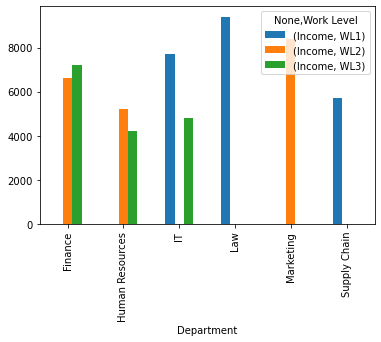

In [ ]:
df = employees.groupby(["Department", "Work Level"])[["Income"]].agg("mean").unstack()
df.plot(kind='bar')

<AxesSubplot:xlabel='Department'>

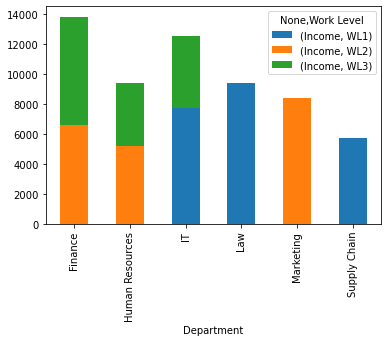

In [ ]:
df.plot(kind='bar', stacked=True)


In [ ]:
employees

,Name,Department,Work Level,Income,Age,Experience
0,Josh,IT,WL3,4800,24,2
1,Mike,Human Resources,WL2,5200,28,5
2,Julia,Finance,WL2,6600,33,9
3,Sergio,Supply Chain,WL1,5700,41,17
4,Julia,Finance,WL3,7200,22,1
5,Michael,Marketing,WL2,8400,46,24
6,Sarath,IT,WL1,7700,31,10
7,Jakub,Human Resources,WL3,4200,27,6
8,Chris,Law,WL1,9400,39,13


In [ ]:
# We get mean of income according to department and work level. 
""" 
`index` : index is the column name which we want to group by.
`columns`: the columns that we want to see in the pivot table.
`values` : the values in each column.

 """
employees.pivot_table(index="Department",columns=["Work Level"],values="Income") 



Work Level,WL1,WL2,WL3
Department,,,
Finance,NaN,6600.0,7200.0
Human Resources,NaN,5200.0,4200.0
IT,7700.0,NaN,4800.0
Law,9400.0,NaN,NaN
Marketing,NaN,8400.0,NaN
Supply Chain,5700.0,NaN,NaN


In [ ]:
exp = pd.cut(employees["Experience"],[0,9,16,24])
exp #We will create a new column

0      (0, 9]
1      (0, 9]
2      (0, 9]
3    (16, 24]
4      (0, 9]
5    (16, 24]
6     (9, 16]
7      (0, 9]
8     (9, 16]
Name: Experience, dtype: category
Categories (3, interval[int64, right]): [(0, 9] < (9, 16] < (16, 24]]

In [ ]:
employees.pivot_table(values="Income",index=["Department",exp],columns="Work Level") 
#We can make it easier.

Work Level                     WL1     WL2     WL3
Department      Experience                        
Finance         (0, 9]         NaN  6600.0  7200.0
Human Resources (0, 9]         NaN  5200.0  4200.0
IT              (0, 9]         NaN     NaN  4800.0
                (9, 16]     7700.0     NaN     NaN
Law             (9, 16]     9400.0     NaN     NaN
Marketing       (16, 24]       NaN  8400.0     NaN
Supply Chain    (16, 24]    5700.0     NaN     NaN

### Visualize Pivot Table

- [https://opendatascience.com/how-to-pivot-and-plot-data-with-pandas/](https://opendatascience.com/how-to-pivot-and-plot-data-with-pandas/)

## Grouping and Sorting


### Groupwise analysis


Any groupby operation involves one of the following operations on the original object. They are;

- Splitting the Object
- Applying a function
- Combining the results

Value which is used for grouping must be categorical variable.

In [64]:
employees = pd.DataFrame({"Name":["Josh","Mike","Julia","Sergio","Julia","Michael","Sarath","Jakub","Chris"],
                          "Department":["IT","Human Resources","Finance","Supply Chain","Finance","Marketing","IT","Human Resources","Law"],
                          "Income":[4800,5200,6600,5700,7200,8400,7700,4200,9400],
                          "Age":[24,28,33,41,22,46,31,27,39],
                          "Experience":[2,5,9,17,1,24,10,6,13]})
employees.head()

,Name,Department,Income,Age,Experience
0,Josh,IT,4800,24,2
1,Mike,Human Resources,5200,28,5
2,Julia,Finance,6600,33,9
3,Sergio,Supply Chain,5700,41,17
4,Julia,Finance,7200,22,1


Departments are categorical variables and we can to group employees by their department. In order to do that, we use groupby() function.

In [65]:
employees.groupby("Department") #It will create an object

In [66]:
employees_departments = employees.groupby("Department")
employees_departments.get_group("IT") #We can get the rows that employee is working in IT department.

,Name,Department,Income,Age,Experience
0,Josh,IT,4800,24,2
6,Sarath,IT,7700,31,10


In [67]:
employees[employees["Department"] == "IT"]


,Name,Department,Income,Age,Experience
0,Josh,IT,4800,24,2
6,Sarath,IT,7700,31,10


We can apply a function to the group.



In [ ]:
employees.groupby("Department").mean() #We can get mean of every department.

,Income,Age,Experience
Department,,,
Finance,6900.0,27.5,5.0
Human Resources,4700.0,27.5,5.5
IT,6250.0,27.5,6.0
Law,9400.0,39.0,13.0
Marketing,8400.0,46.0,24.0
Supply Chain,5700.0,41.0,17.0


In [ ]:
employees.groupby("Department").mean()["Income"] #We can also get mean of each department by a spesific column.

Department
Finance            6900.0
Human Resources    4700.0
IT                 6250.0
Law                9400.0
Marketing          8400.0
Supply Chain       5700.0
Name: Income, dtype: float64

In [ ]:
employees.groupby("Department")["Experience"].sum()

Department
Finance            10
Human Resources    11
IT                 12
Law                13
Marketing          24
Supply Chain       17
Name: Experience, dtype: int64

In [ ]:
employees.groupby("Department").sum()["Experience"]

Department
Finance            10
Human Resources    11
IT                 12
Law                13
Marketing          24
Supply Chain       17
Name: Experience, dtype: int64

In [ ]:
employees.groupby("Department")["Age"].describe() 

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
Finance,2.0,27.5,7.778175,22.0,24.75,27.5,30.25,33.0
Human Resources,2.0,27.5,0.707107,27.0,27.25,27.5,27.75,28.0
IT,2.0,27.5,4.949747,24.0,25.75,27.5,29.25,31.0
Law,1.0,39.0,NaN,39.0,39.00,39.0,39.00,39.0
Marketing,1.0,46.0,NaN,46.0,46.00,46.0,46.00,46.0
Supply Chain,1.0,41.0,NaN,41.0,41.00,41.0,41.00,41.0


If we want to apply more than 1 function, we need to use `agg()`. It is same as `aggregate()`.

In [ ]:
employees.groupby("Department")["Age"].agg(["mean", "max", "median"])
#We get mean, max and median of Age in each department.


,mean,max,median
Department,,,
Finance,27.5,33,27.5
Human Resources,27.5,28,27.5
IT,27.5,31,27.5
Law,39.0,39,39.0
Marketing,46.0,46,46.0
Supply Chain,41.0,41,41.0


In [ ]:
employees.groupby("Department")["Income"].agg(["mean","max","median"]).loc["Finance"] 

mean      6900.0
max       7200.0
median    6900.0
Name: Finance, dtype: float64

In [ ]:
employees.groupby("Department").aggregate(["max", "min"])
#We get max and min values in each department.


Name          Income       Age     Experience    
                     max      min    max   min max min        max min
Department                                                           
Finance            Julia    Julia   7200  6600  33  22          9   1
Human Resources     Mike    Jakub   5200  4200  28  27          6   5
IT                Sarath     Josh   7700  4800  31  24         10   2
Law                Chris    Chris   9400  9400  39  39         13  13
Marketing        Michael  Michael   8400  8400  46  46         24  24
Supply Chain      Sergio   Sergio   5700  5700  41  41         17  17

In [ ]:
employees.groupby("Department").aggregate({"Income": "mean", "Age": "max"})
#We can get different statistics for different columns thanks to dictionary.

,Income,Age
Department,,
Finance,6900.0,33
Human Resources,4700.0,28
IT,6250.0,31
Law,9400.0,39
Marketing,8400.0,46
Supply Chain,5700.0,41


#### Example:

In [ ]:
ipl = pd.read_csv('ipl.csv')
ipl.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
0,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.0,10.436975,0
1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.0,10.525424,0
2,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.0,10.615385,0
3,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.5,10.603448,0
4,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.4,10.486957,0


,batting_team,result,count
0,Chennai Super Kings,0,2984
1,Chennai Super Kings,1,5358
2,Deccan Chargers,0,2509
3,Deccan Chargers,1,1108
4,Delhi Capitals,0,341


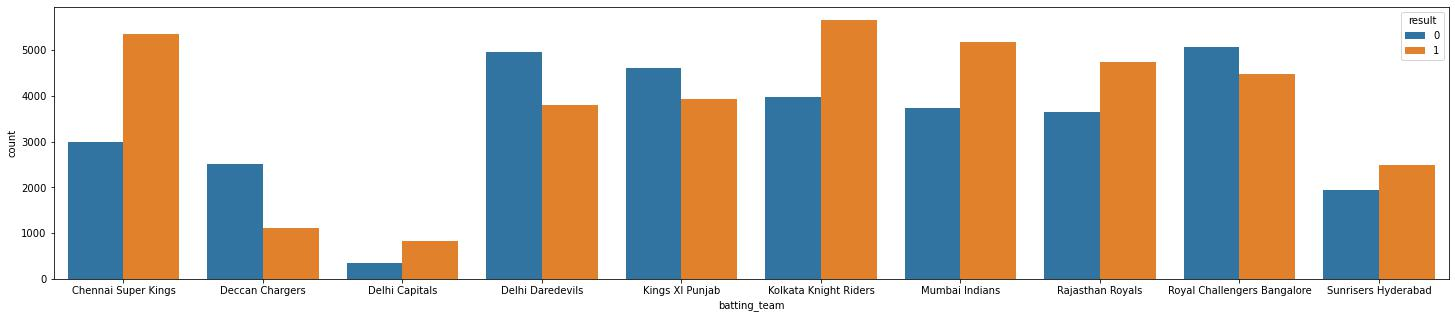

In [ ]:
batting_team_wining = ipl[['batting_team','result']].groupby(['batting_team','result']).agg({'result':'count'}).rename(columns={'result':'count'}).reset_index()
plt.figure(figsize=(25,5))
sns.barplot(x='batting_team',y='count',hue='result',data=batting_team_wining)
batting_team_wining.head()

<AxesSubplot:xlabel='bowling_team', ylabel='count'>

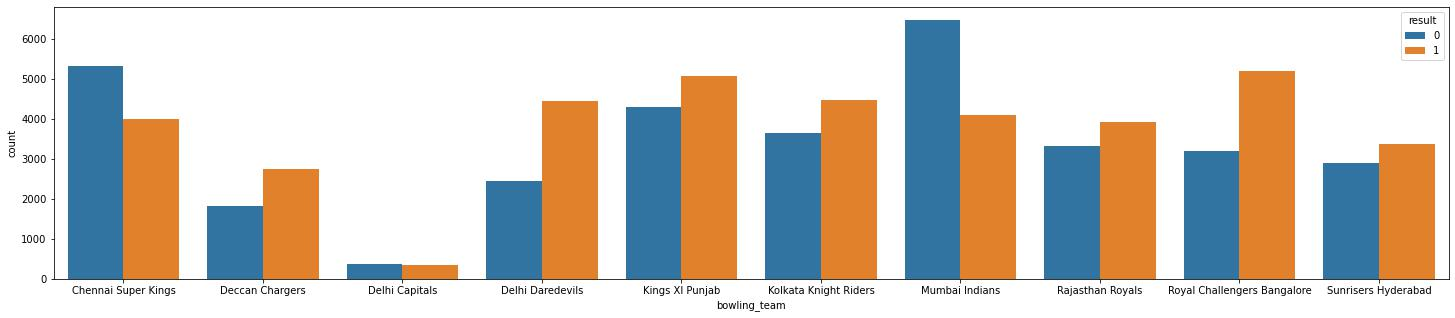

In [ ]:
bowling_team = ipl[['bowling_team','result']].groupby(['bowling_team','result']).agg({'result':'count'}).rename(columns={'result':'count'}).reset_index()
plt.figure(figsize=(25,5))
sns.barplot(x='bowling_team',y='count',hue='result',data=bowling_team)

In [ ]:
city = ipl[['bowling_team','city','result']].groupby(['bowling_team','city','result']).agg({'result':'count'}).rename(columns={'result':'count'})
city

count
bowling_team        city          result       
Chennai Super Kings Abu Dhabi     0          96
                                  1         118
                    Ahmedabad     1         111
                    Bangalore     0         369
                                  1         116
...                                         ...
Sunrisers Hyderabad Raipur        0         120
                                  1         125
                    Sharjah       1         117
                    Visakhapatnam 0         103
                                  1         246

[244 rows x 1 columns]

In [ ]:
grouped = city.groupby(['bowling_team','city','result','count']).count().reset_index()
grouped


,bowling_team,city,result,count
0,Chennai Super Kings,Abu Dhabi,0,96
1,Chennai Super Kings,Abu Dhabi,1,118
2,Chennai Super Kings,Ahmedabad,1,111
3,Chennai Super Kings,Bangalore,0,369
4,Chennai Super Kings,Bangalore,1,116
...,...,...,...,...
239,Sunrisers Hyderabad,Raipur,0,120
240,Sunrisers Hyderabad,Raipur,1,125
241,Sunrisers Hyderabad,Sharjah,1,117
242,Sunrisers Hyderabad,Visakhapatnam,0,103


<AxesSubplot:xlabel='city', ylabel='count'>

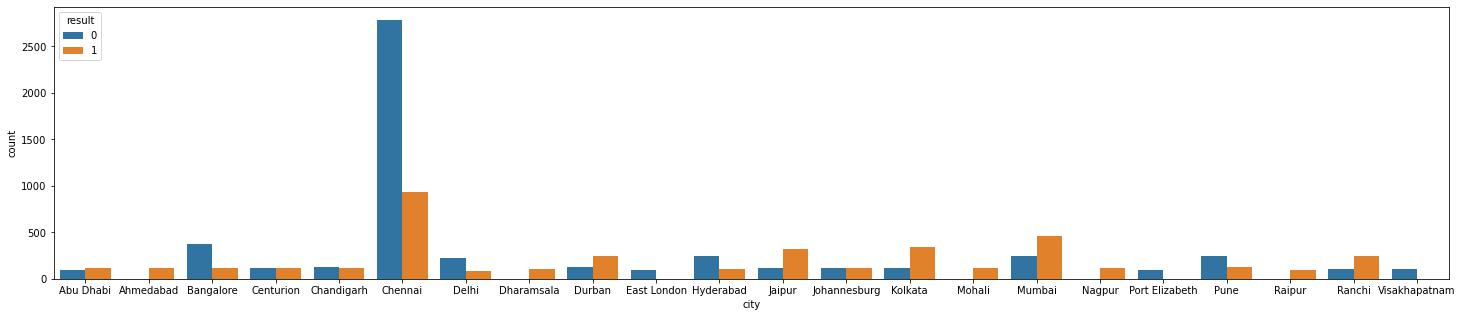

In [ ]:
chn = grouped[grouped['bowling_team'] == 'Chennai Super Kings']
plt.figure(figsize=(25,5))
sns.barplot(x='city',y='count',hue='result',data=chn)

<AxesSubplot:xlabel='city', ylabel='count'>

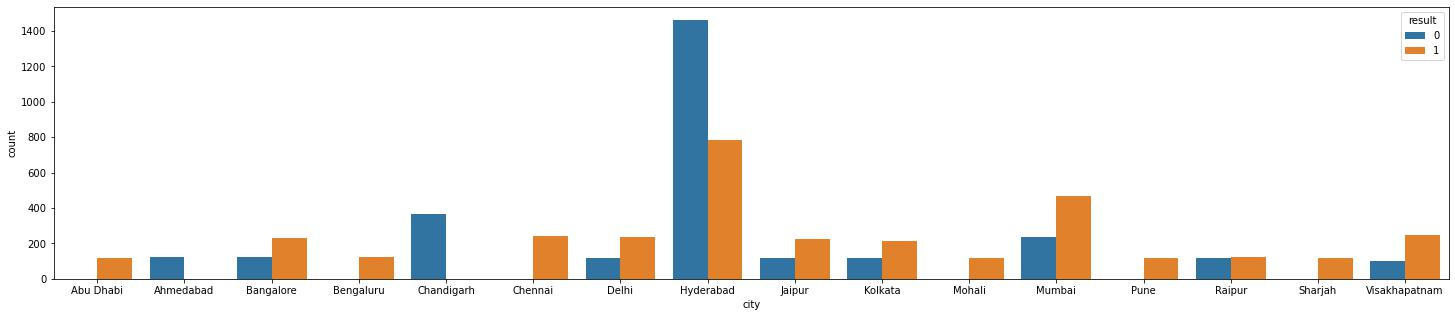

In [ ]:
sh = grouped[grouped['bowling_team'] == 'Sunrisers Hyderabad']
plt.figure(figsize=(25,5))
sns.barplot(x='city',y='count',hue='result',data=sh)

### Sorting: `sort_index`, `sort_values`

#### `sort_index`

You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their **index label**, in ascending order, but let's reverse the order:

In [68]:
df = pd.DataFrame({"Name": ["Josh", "Mike", "Ana", "Yohanna"], "Employee_Number": [11286474, 17588462, 26735655, 18653472],
                   "Income": [5000, 7000, 9000, 6000], "Age": [35, 19, 26, 32]}, index=[21, 43, 32, 1])
df


,Name,Employee_Number,Income,Age
21,Josh,11286474,5000,35
43,Mike,17588462,7000,19
32,Ana,26735655,9000,26
1,Yohanna,18653472,6000,32


In [69]:
df.sort_index(inplace=True)
df


,Name,Employee_Number,Income,Age
1,Yohanna,18653472,6000,32
21,Josh,11286474,5000,35
32,Ana,26735655,9000,26
43,Mike,17588462,7000,19


#### `sort_values`

To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [70]:
employees = pd.DataFrame({"Name": ["Josh", "Mike", "Julia", "Sergio", "Julia"],
                          "Department": ["IT", "Human Resources", "Finance", "Supply Chain", "Finance"],
                          "Income": [4800, 5200, 6600, 5700, 7200],
                          "Age": [24, 28, 33, 41, 22]})
employees


,Name,Department,Income,Age
0,Josh,IT,4800,24
1,Mike,Human Resources,5200,28
2,Julia,Finance,6600,33
3,Sergio,Supply Chain,5700,41
4,Julia,Finance,7200,22


In [71]:
employees.sort_values(by="Age")  # We sort it by age column


,Name,Department,Income,Age
4,Julia,Finance,7200,22
0,Josh,IT,4800,24
1,Mike,Human Resources,5200,28
2,Julia,Finance,6600,33
3,Sergio,Supply Chain,5700,41


In [72]:
# We sort it by descending age
employees.sort_values(by="Age", ascending=False)


,Name,Department,Income,Age
3,Sergio,Supply Chain,5700,41
2,Julia,Finance,6600,33
1,Mike,Human Resources,5200,28
0,Josh,IT,4800,24
4,Julia,Finance,7200,22


In [73]:
employees.sort_values(by=["Name","Income"]) #It will first sort by name and then it will compare income column

,Name,Department,Income,Age
0,Josh,IT,4800,24
2,Julia,Finance,6600,33
4,Julia,Finance,7200,22
1,Mike,Human Resources,5200,28
3,Sergio,Supply Chain,5700,41


In [74]:
employees.sort_values(by=["Name", "Age"], ascending=[True, False])
#We can also sort one column ascending order and descending with other column


,Name,Department,Income,Age
0,Josh,IT,4800,24
2,Julia,Finance,6600,33
4,Julia,Finance,7200,22
1,Mike,Human Resources,5200,28
3,Sergio,Supply Chain,5700,41


#### `nlargest()` and `nsmallest()`

In [75]:
employees["Income"].nlargest(2)


4    7200
2    6600
Name: Income, dtype: int64

In [ ]:
employees["Income"].nsmallest(2)

0    4800
1    5200
Name: Income, dtype: int64

### `groupby()` and `transform()`

- [https://www.statology.org/pandas-groupby-transform/](https://www.statology.org/pandas-groupby-transform/)

The `groupby()` and `transform()` methods in Pandas are used to group and transform data, respectively.

In [108]:
df = pd.DataFrame({'team': ['A', 'B', 'C', 'A', 'A', 'B', 'D'],
                   'points': [30, 22, 19, 14, 14, 11, 20]})
df.head(2)

,team,points
0,A,30
1,B,22


In [109]:
# Group the data by column C
grouped_df = df.groupby(by='team')

# Compute the mean of column B for each group
mean_points = grouped_df['points'].transform('mean')

# Add the mean of column B to the original DataFrame
df['mean_points'] = mean_points

# adding count colum
df['team_count'] = df.groupby(by='team')['team'].transform('count')
df

,team,points,mean_points,team_count
0,A,30,19.333333,3
1,B,22,16.500000,2
2,C,19,19.000000,1
3,A,14,19.333333,3
4,A,14,19.333333,3
5,B,11,16.500000,2
6,D,20,20.000000,1


## Categorical encoding 

### Introduction

In many Machine-learning or Data Science activities, the**data set might contain text or categorical values** (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as CATBOAST, decision-trees can handle categorical values very well but **most of the algorithms expect numerical values** to achieve state-of-the-art results.

Over your learning curve in AI and Machine Learning, one thing you would notice that **most of the algorithms work better with numerical inputs**. *Therefore, the main challenge faced by an analyst is to convert text/categorical data into numerical data and still make an algorithm/model to make sense out of it*. **Neural networks, which is a base of deep-learning, expects input values to be numerical.**

There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set. Hereby, I would focus on 2 main methods:` One-Hot-Encoding` and `Label-Encoder`.

<div align="center">
<img src="img/len.jpg" alt="encoding.jpg" width="800px">
</div>


[More](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)

### Label Encoding

#### 🌟🌟Custom Map Function

In [ ]:
# creating initial dataframe
gender_types = ['male','female','other','male','female','male','male','female','other']
gender_df = pd.DataFrame(gender_types, columns=['gender'])
gender_df['gender'].unique()


array(['male', 'female', 'other'], dtype=object)

In [ ]:
def f(g):
	if g == 'male':
		return 0
	elif g == "female":
		return 1
	else:
		return 2

gender_df['label'] = gender_df.gender.apply(f)
gender_df['label'].unique()


array([0, 1, 2], dtype=int64)

##### 🚀Unique Values with labels assigned side-by-side🚀

In [ ]:
gender_df[['gender','label']].drop_duplicates()

,gender,label
0,male,0
1,female,1
2,other,2


#### 🌟🌟`sklearn.LabelEncoder()`


In [ ]:
# creating initial dataframe
gender_types = ['male','female','other','male','female','male','male','female','other']
gender_df = pd.DataFrame(gender_types, columns=['gender'])
gender_df['gender'].unique()


array(['male', 'female', 'other'], dtype=object)

In [ ]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
# Assigning numerical values and storing in another column
gender_df['label'] = labelencoder.fit_transform( gender_df['gender'])
gender_df['label'].unique()


array([1, 0, 2])

In [ ]:
gender_df[['gender','label']].drop_duplicates()

,gender,label
0,male,1
1,female,0
2,other,2


##### Decoding

In [ ]:
labelencoder.inverse_transform([0])

array(['female'], dtype=object)

In [ ]:
labelencoder.inverse_transform([0,0,1,1,1,2])

array(['female', 'female', 'male', 'male', 'male', 'other'], dtype=object)

### One-Hot-Encoding

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. 

##### Using `Pandas.get_dummies()`

In [ ]:
gender_df

,gender,label
0,male,1
1,female,0
2,other,2


In [ ]:
pd.get_dummies(gender_df.gender)

,female,male,other
0,0,1,0
1,1,0,0
2,0,0,1


In [ ]:
pd.get_dummies(gender_df.gender,prefix='Sex')

,Sex_female,Sex_male,Sex_other
0,0,1,0
1,1,0,0
2,0,0,1


Attaching to the DataFrame:

In [ ]:
dummies = pd.get_dummies(gender_df.gender,prefix='Sex')
gender_df = pd.concat([gender_df, dummies], axis=1)
gender_df

,gender,label,Sex_female,Sex_male,Sex_other
0,male,1,0,1,0
1,female,0,1,0,0
2,other,2,0,0,1


Multiple Columns can be transform at a time : i.e df = pd.get_dummies(df, columns=['Sex', 'Embarked'])


[More](https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970)

#### Using 🌟`sklearn.OneHotEncoder()`🌟

In [ ]:
gender_df

,gender,label
0,male,1
1,female,0
2,other,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(gender_df[['label']]).toarray())
enc_df

,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


In [ ]:
# merge with main df gender_df on key values
gender_df = gender_df.join(enc_df)
gender_df

,gender,label,0,1,2
0,male,1,0.0,1.0,0.0
1,female,0,1.0,0.0,0.0
2,other,2,0.0,0.0,1.0


### Discretization

In [ ]:
data = [['Alex',10],['Bob',16],['Clarke',26],['James',24],['John',69]]
df = pd.DataFrame(data,columns=['name','age'])

In [ ]:
category = ['Child', 'Young', 'Adults', 'Senior']

df['category']=pd.cut(x=df['age'], bins=[0,14,24,64,100],labels=category)
df

,name,age,category
0,Alex,10,Child
1,Bob,16,Young
2,Clarke,26,Adults
3,James,24,Young
4,John,69,Senior


## Visualization with Pandas

In [ ]:
df = pd.DataFrame(np.random.rand(5, 4), columns=('col_1', 'col_2', 'col_3', 'col_4'))
df

,col_1,col_2,col_3,col_4
0,0.783665,0.129221,0.116408,0.615972
1,0.378006,0.832395,0.056807,0.249400
2,0.907770,0.255317,0.941790,0.821238
3,0.664070,0.922278,0.519170,0.080435
4,0.535642,0.290582,0.804460,0.769953


### Line plot

<AxesSubplot:>

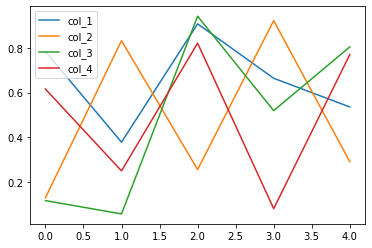

In [ ]:
df.plot()

<AxesSubplot:xlabel='col_1'>

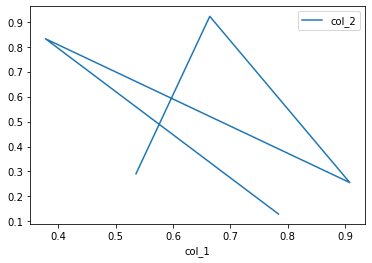

In [ ]:
df.plot(x="col_1", y="col_2")

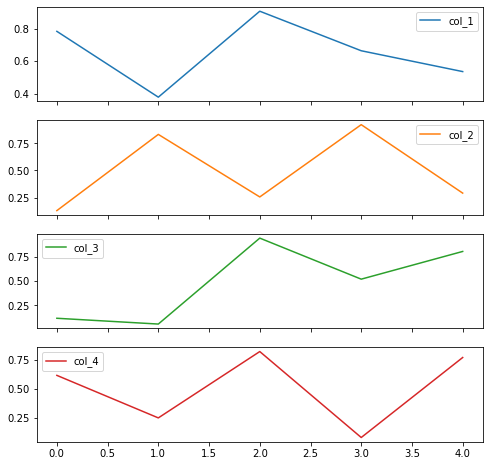

In [ ]:
df.plot(subplots=True, figsize=(8, 8));

### Scatter plot

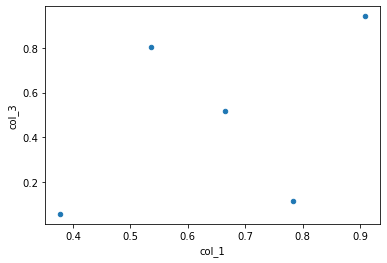

In [ ]:
df.plot.scatter(x='col_1', y='col_3');

<AxesSubplot:xlabel='col_2', ylabel='col_4'>

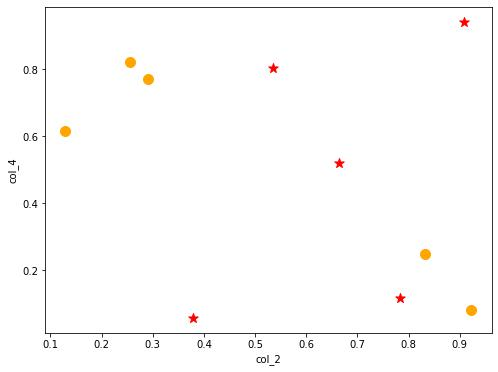

In [ ]:
fig,ax= plt.subplots(figsize=(8,6))
df.plot.scatter(x="col_1", y="col_3", color="red", marker="*", s=100, ax=ax)
df.plot.scatter(x="col_2", y="col_4", color="orange", s=100, ax=ax)


<AxesSubplot:xlabel='col_2', ylabel='col_4'>

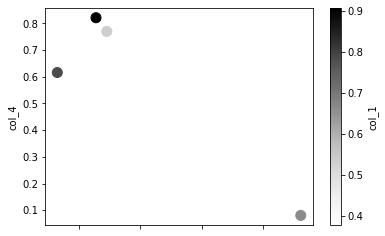

In [ ]:
df.plot.scatter(x="col_2", y="col_4", c='col_1', s=100)


<AxesSubplot:xlabel='col_2', ylabel='col_4'>

### Bar plot

<AxesSubplot:>

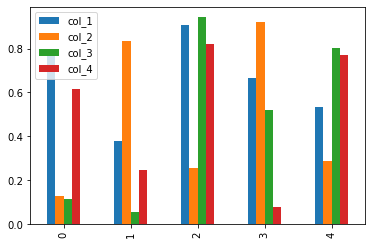

In [ ]:
df.plot(kind="bar")

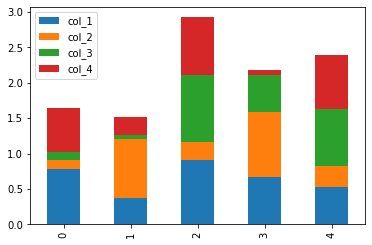

In [ ]:
df.plot.bar(stacked=True);


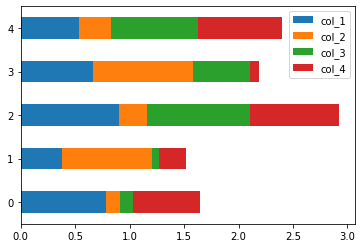

In [ ]:
df.plot.barh(stacked=True)


### Box plot


<AxesSubplot:>

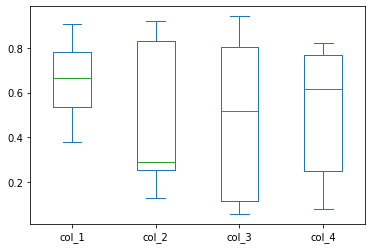

In [ ]:
df.plot.box()

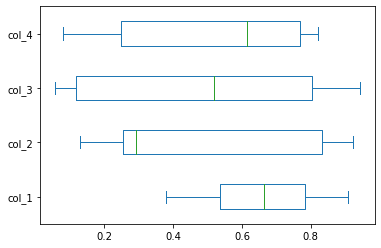

In [ ]:
df.plot.box(vert=False, positions=[1, 2, 3, 4]);

### Area plot

<AxesSubplot:>

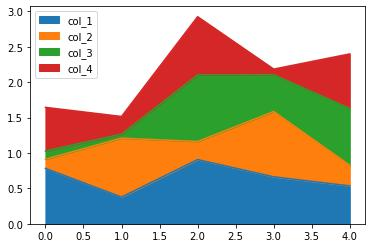

In [ ]:
df.plot.area()

<AxesSubplot:>

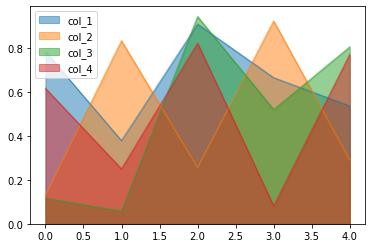

In [ ]:
df.plot.area(stacked=False)


### Pie chart


In [ ]:
pie = pd.Series(np.random.rand(5))
pie

0    0.470897
1    0.461236
2    0.572479
3    0.003232
4    0.742008
dtype: float64

<AxesSubplot:ylabel='None'>

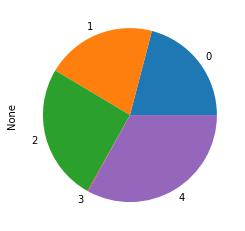

In [ ]:
pie.plot.pie()

array([<AxesSubplot:ylabel='col_1'>, <AxesSubplot:ylabel='col_2'>,
       <AxesSubplot:ylabel='col_3'>, <AxesSubplot:ylabel='col_4'>],
      dtype=object)

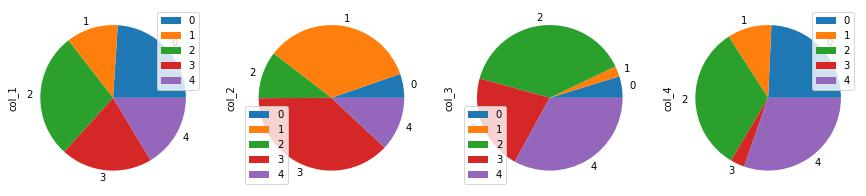

In [ ]:
df.plot.pie(subplots=True, figsize=(15, 15))
